<a href="https://colab.research.google.com/github/sakshisahu612/PCOS-Diagnosis-EDA/blob/main/PCOS_Diagnosis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

**QUES1.** ARE THERE ANY INCONSISTENT OR INCORRECT DATA ENTRIES THAT NEED TO BE CORRECTED OR STANDARDISED?

In [ ]:
# importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid')

In [ ]:
from pandas.io.parsers.readers import read_csv
pcosinf=pd.read_csv('PCOS_infertility.csv')
without= pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name='Full_new')

In [ ]:
without.shape

(541, 45)

In [ ]:
without.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
without.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
# df has a column which is unknown so dropping that column
final = without.drop(columns=['Unnamed: 44'])

In [ ]:
final.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [ ]:
# there are 4 object datatypes in the df but they are all in numeric form
# so converting the object dt to numeric.

final["AMH(ng/mL)"] = pd.to_numeric(final["AMH(ng/mL)"], errors='coerce')
final["II    beta-HCG(mIU/mL)"] = pd.to_numeric(final["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
# checking for missing values
final.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
# there are 4 columns which have 1 missing value
# replacing the missing value with the median


final['Marraige Status (Yrs)'].fillna(final['Marraige Status (Yrs)'].median(),inplace=True)
final['II    beta-HCG(mIU/mL)'].fillna(final['II    beta-HCG(mIU/mL)'].median(),inplace=True)
final['AMH(ng/mL)'].fillna(final['AMH(ng/mL)'].median(),inplace=True)
final['Fast food (Y/N)'].fillna(final['Fast food (Y/N)'].median(),inplace=True)


Summarizing analysis and observation

The missing values in the set were replaced with the median. One column had no meaning so dropped that column. Also, converted the object data type into numeric for better understanding of the dataset.

**QUES 2.** HOW CAN WE VISUALISE THE DISTRIBUTION OF PCOS DIAGNOSIS IN THE DATASET?

In [ ]:
final['PCOS (Y/N)'].value_counts(normalize=True)

0    0.672828
1    0.327172
Name: PCOS (Y/N), dtype: float64

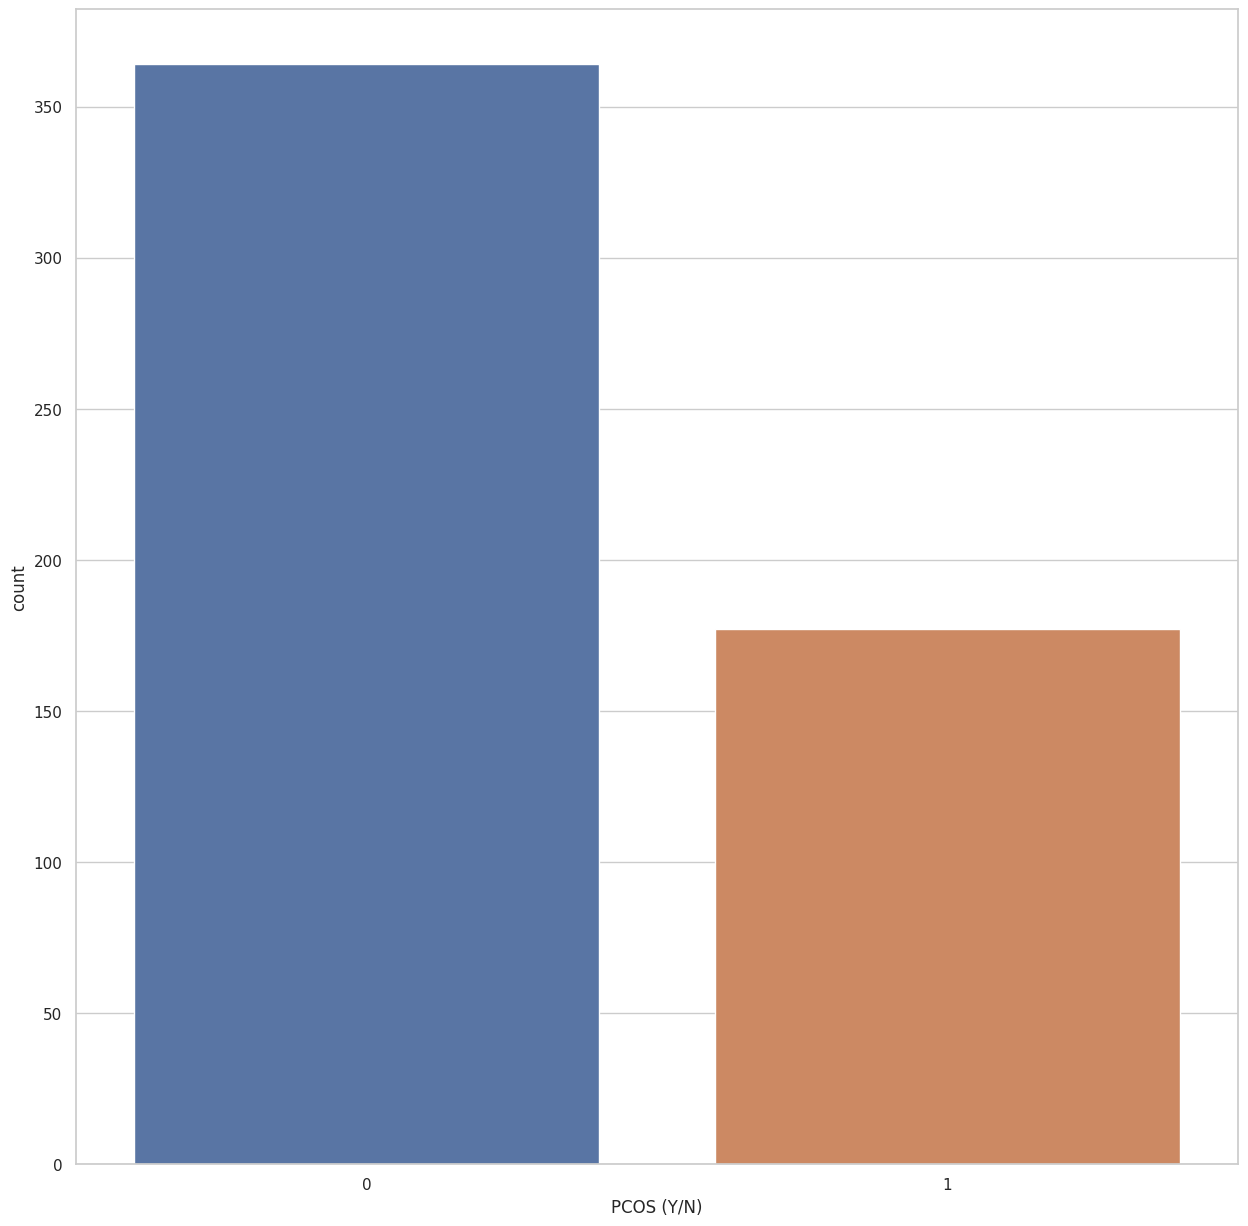

In [ ]:
sns.countplot(x=final['PCOS (Y/N)'])
plt.show()

Summarizing your analysis and observations

As we can see that more 60% of women does not have PCOS among the above data.

**QUES 3.** CAN WE CREATE VISUAISATION TO UNDERSTAND THE RELATIONSHIP BETWEEN DIFFERENT DIAGNOSTIC FEATURES (eg. hormonal levels,physical characteristics) AND THE LIVELIHOOD OF PCOS?

Hormonal levels, Physical characterstics contains columns such as

1.   Hair Growth
2.   Skin darkening
3.   Pimples
4.   Weight Gain
5.   Hair Loss

In [ ]:
# analysis of PCOS (Y) and Pimple(Y/N)
pimpanaly = final[final['PCOS (Y/N)'] == 1]['Pimples(Y/N)'].value_counts(normalize=True)
pimpanaly

1    0.694915
0    0.305085
Name: Pimples(Y/N), dtype: float64

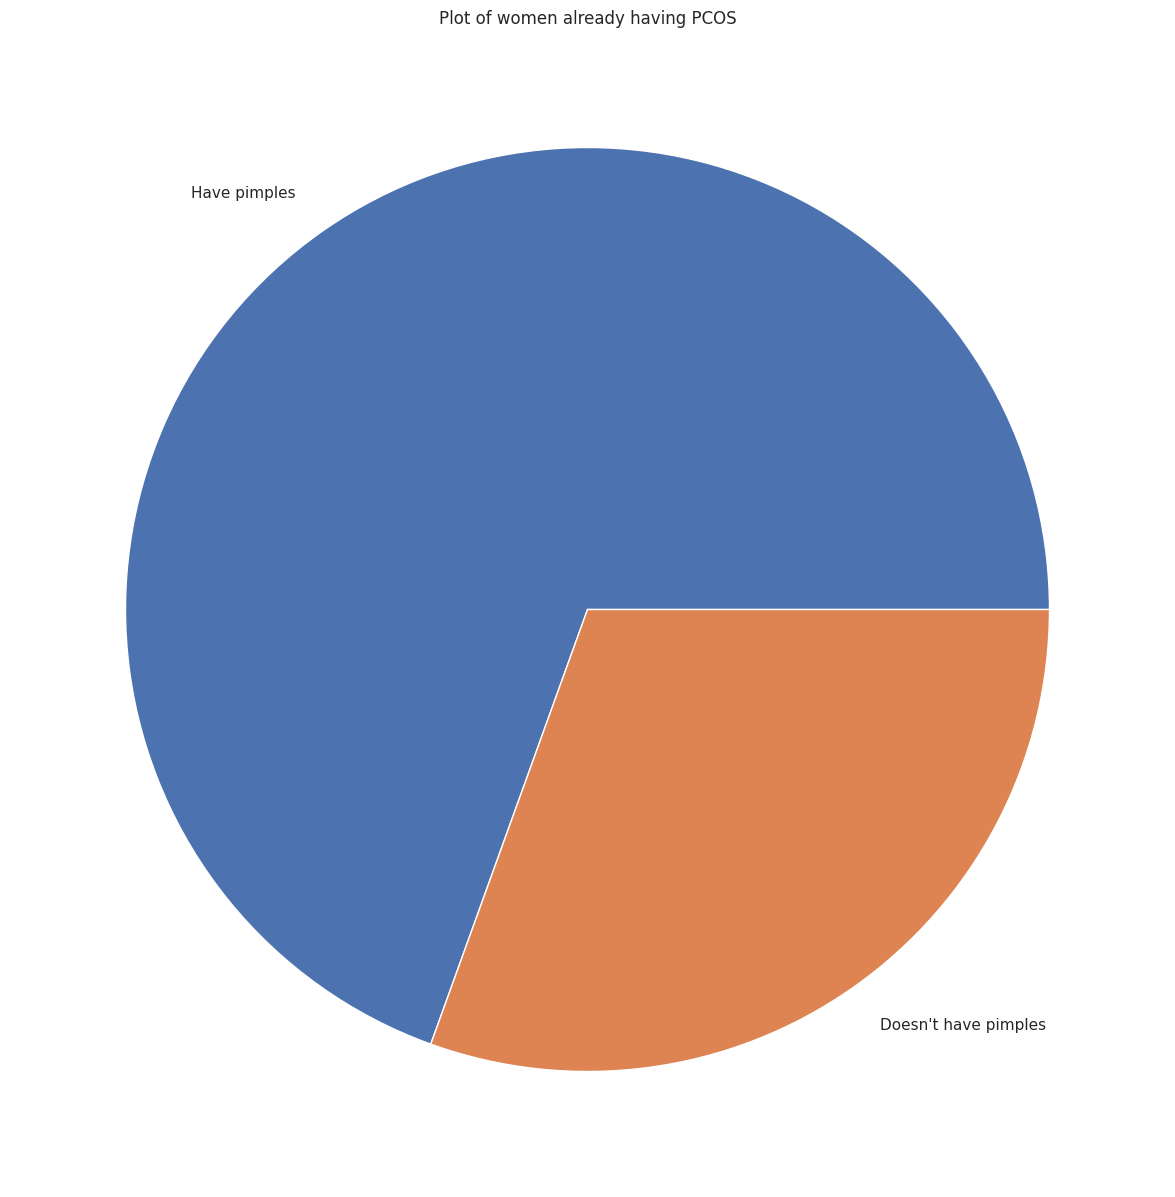

In [ ]:
plt.pie(pimpanaly, labels=["Have pimples", "Doesn't have pimples"])
plt.title("Plot of women already having PCOS")
plt.show()


As we can see that among the women suffering from PCOS, almost 70% women have also grown pimples.

In [ ]:
# analysis of PCOS (Y) and Skin darkening
skindar = final[final['PCOS (Y/N)'] == 1]['Skin darkening (Y/N)'].value_counts(normalize=True)
skindar

1    0.621469
0    0.378531
Name: Skin darkening (Y/N), dtype: float64

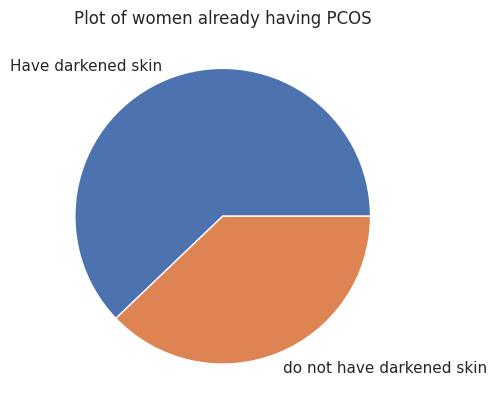

In [ ]:
plt.pie(skindar, labels=['Have darkened skin', 'do not have darkened skin'])
plt.title('Plot of women already having PCOS')
plt.show()

As we can see that more than 60% of women suffering from PCOS have darkened skin.

In [ ]:
# analysis of PCOS (Y) and Hair Growth
hair = final[final['PCOS (Y/N)'] == 1]['hair growth(Y/N)'].value_counts(normalize=True)
hair

1    0.570621
0    0.429379
Name: hair growth(Y/N), dtype: float64

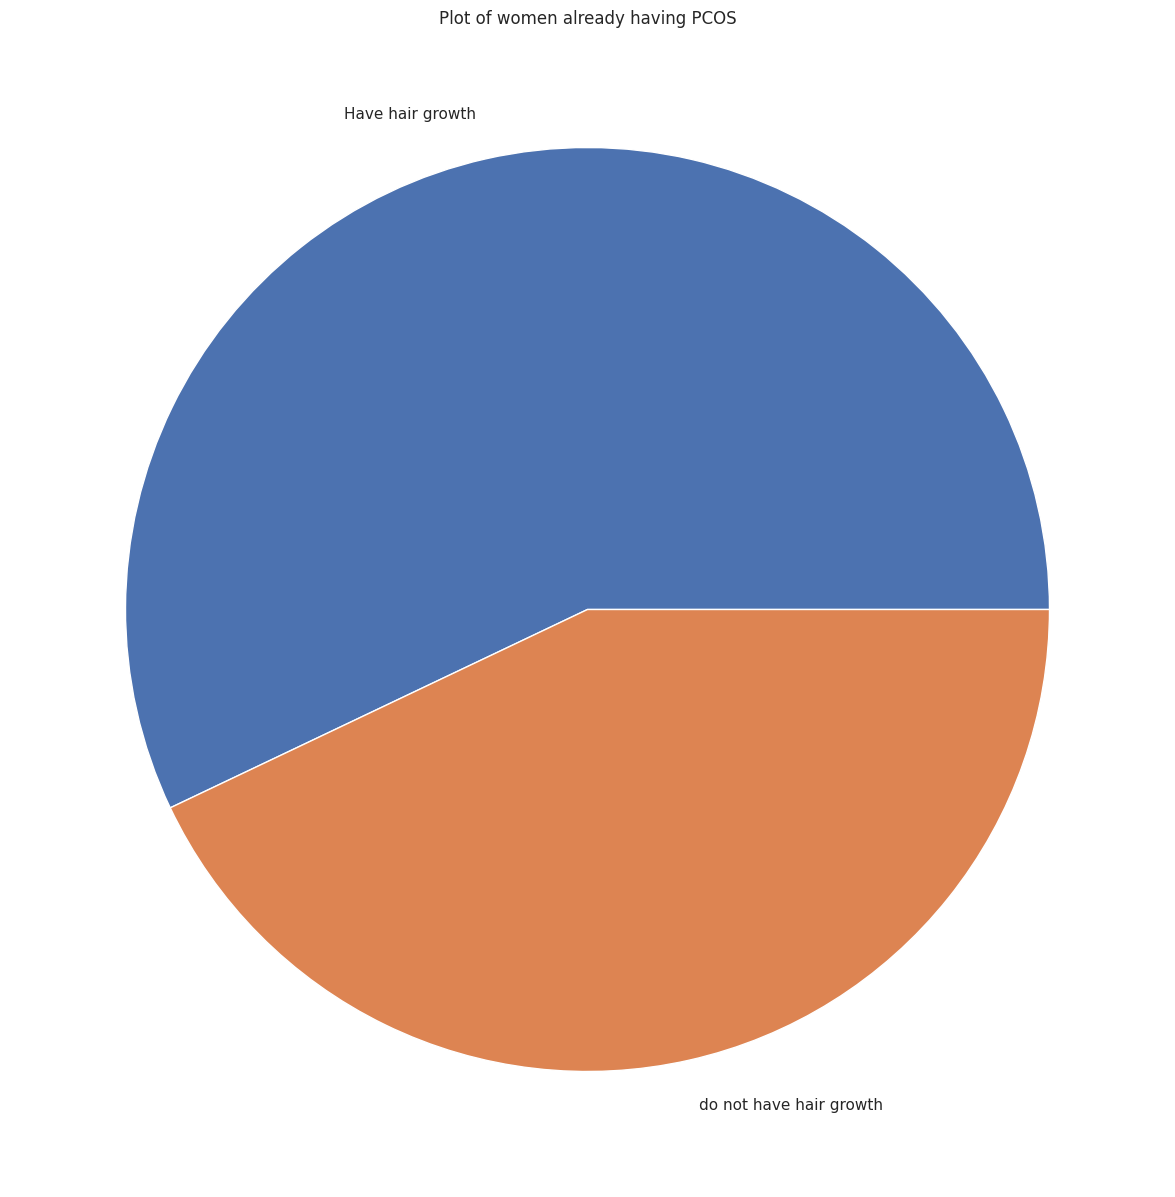

In [ ]:
plt.pie(hair, labels=['Have hair growth', 'do not have hair growth'])
plt.title('Plot of women already having PCOS')
plt.show()

As we can see that almost 60% of women having PCOS have growth their hair

In [ ]:
# analysis of PCOS (Y) and Weight gain
weight= final[final['PCOS (Y/N)'] == 1]['Weight gain(Y/N)'].value_counts(normalize=True)
weight

1    0.683616
0    0.316384
Name: Weight gain(Y/N), dtype: float64

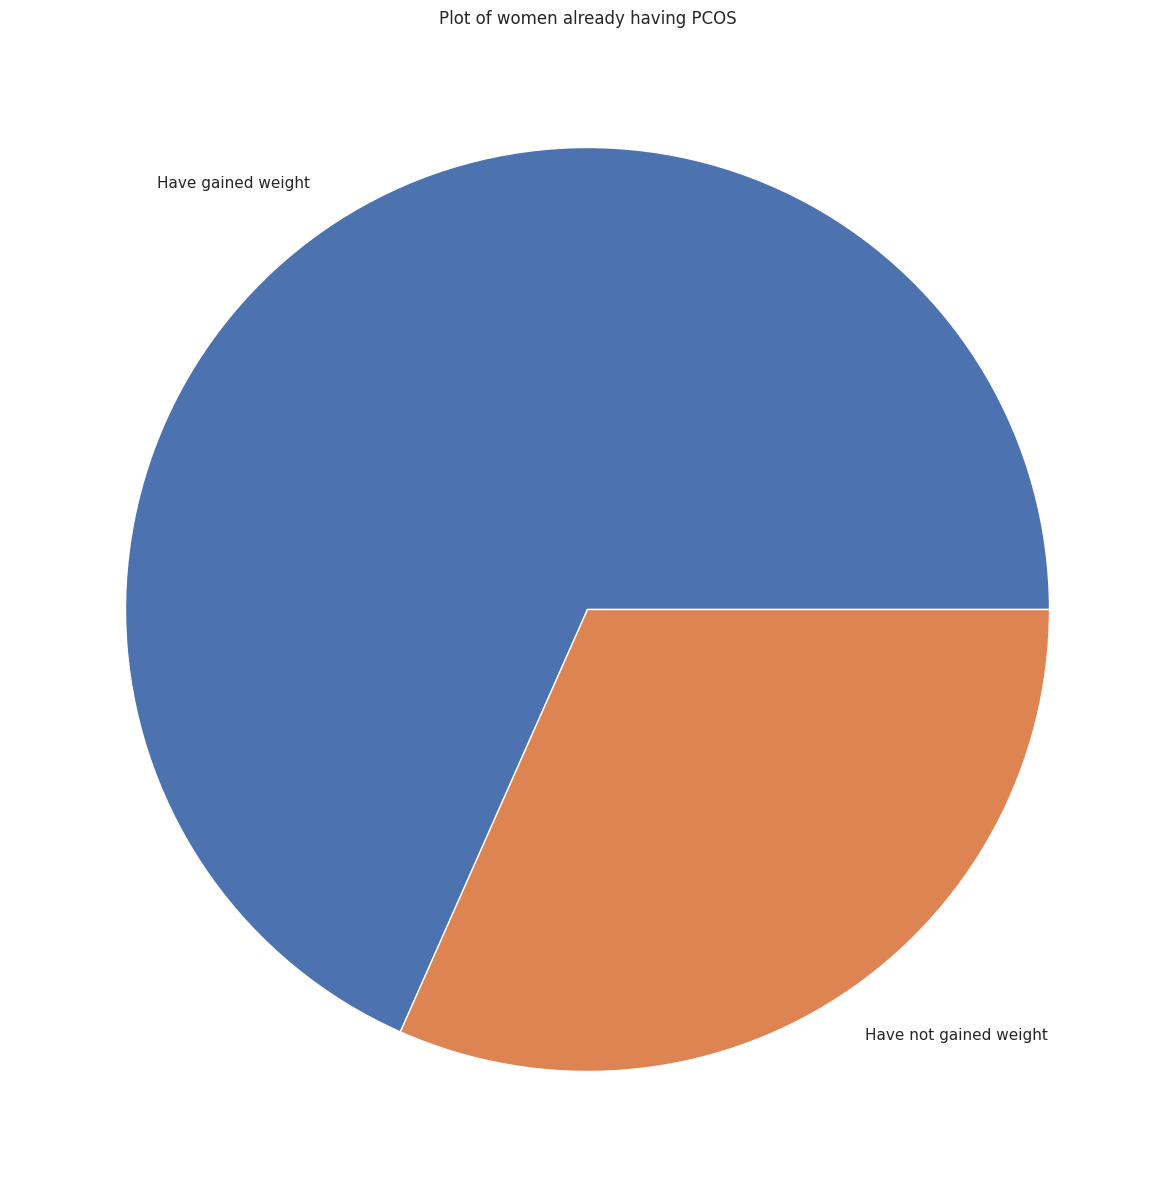

In [ ]:
plt.pie(weight, labels=['Have gained weight', 'Have not gained weight'])
plt.title('Plot of women already having PCOS')
plt.show()

As we can see that almost 70% of women suffering from PCOS have gained weight.



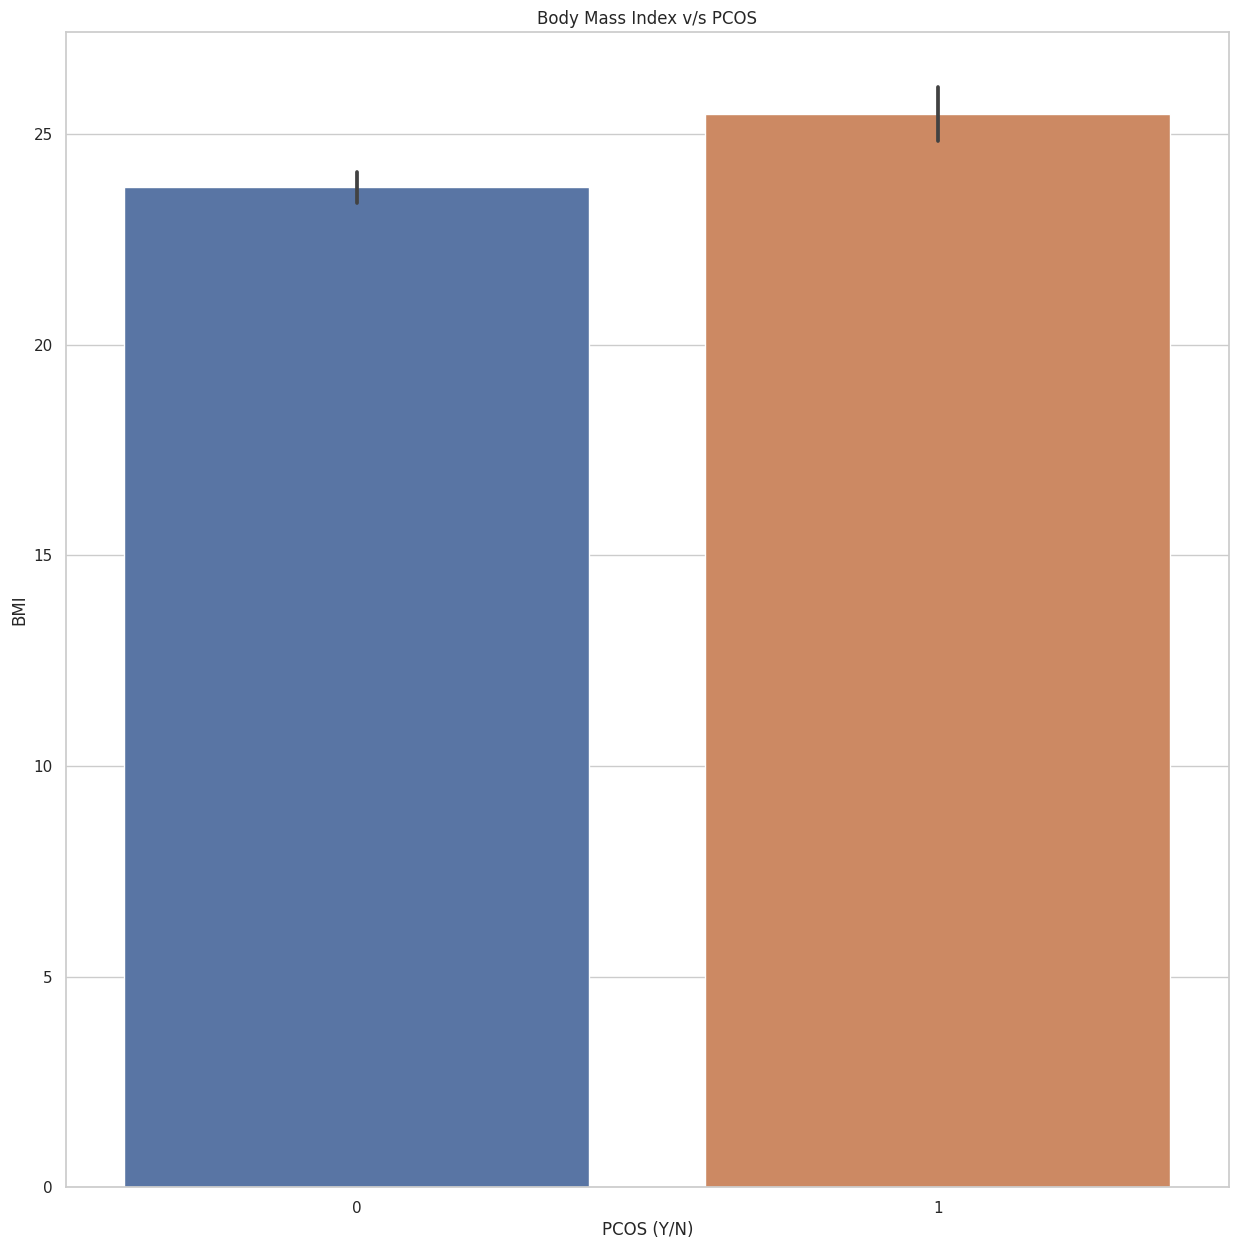

In [ ]:
sns.barplot(x=final['PCOS (Y/N)'], y=final['BMI'])
plt.title('Body Mass Index v/s PCOS')
plt.show()

It can be seen that person having higher Body Mass Index have slightly higher chances of having PCOS.


Summarizing analysis and observations

As we saw that women almost 60% of the women having pimples, have growth hair, gained weight and darkened their skin.

**QUES 4.** HOW CAN WE VISUALISE THE CORRELATION BETWEEN DIFFERENT FEATURES AND IDENTIFY ANY SIGNIFICANT RELATIONSHIPS?

In [ ]:
#Examaning a correlation matrix of all the features

cormatrix = final.corr()

#How all the features correlate with the PCOS

cormatrix["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

Summarising the analysis and observations


As we can see that the chances of PCOS mostly depends on

1.   Follicle No. (R)
2.   Follicle No. (L)
3.   Skin darkening (Y/N)      
4.   Hair growth(Y/N)          
5.   Weight gain(Y/N)          
6.   Cycle(R/I)                
7.   Fast food (Y/N)           

**QUES 5.** CAN WE VISUALISE THE DISTRIBUTION OF DIFFERENT FEATURES FOR PCOS POSITIVE AND NEGATIVE CASES SEPARATELY TO IDENTIFY PATTERNS?

Plot of positives have already been done earlier with Gained Weight, Pimples etc

In [ ]:
# analysis of PCOS (N) and Pimple(Y/N)
values = final[final['PCOS (Y/N)'] == 0]['Pimples(Y/N)'].value_counts(normalize=True)
values

0    0.60989
1    0.39011
Name: Pimples(Y/N), dtype: float64

In [ ]:
# analysis of PCOS (N) and Skin darkening (Y/N)
values = final[final['PCOS (Y/N)'] == 0]['Skin darkening (Y/N)'].value_counts(normalize=True)
values

0    0.846154
1    0.153846
Name: Skin darkening (Y/N), dtype: float64

In [ ]:
# analysis of PCOS (N) and hair growth (Y/N)
values = final[final['PCOS (Y/N)'] == 0]['hair growth(Y/N)'].value_counts(normalize=True)
values

0    0.870879
1    0.129121
Name: hair growth(Y/N), dtype: float64

In [ ]:
# analysis of PCOS (N) and weight gain (Y/N)
values = final[final['PCOS (Y/N)'] == 0]['Weight gain(Y/N)'].value_counts(normalize=True)
values

0    0.771978
1    0.228022
Name: Weight gain(Y/N), dtype: float64

Summarizing analysis and observation

It is observable that women who don't have PCOS

Out of which only 40% women have pimples

Out of which only 15% women have darkened their skin

Out of which only 12% women have growth their hair

Out of which only 22% women have gained weight

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
# we can remove some columns which have no or very less impact on the output
corr_features=cormatrix['PCOS (Y/N)'].abs().sort_values(ascending=False)

#features with correlation more than 0.4

corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [ ]:
X = final[corr_features]
Y = final['PCOS (Y/N)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape, X_test.shape

((432, 7), (109, 7))

In [ ]:
Y_train.shape, Y_test.shape

((432,), (109,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.score(X_test, Y_test)

0.9908256880733946

In [ ]:
model.score(X_train, Y_train)

0.9976851851851852

In [ ]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
np.array(Y_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

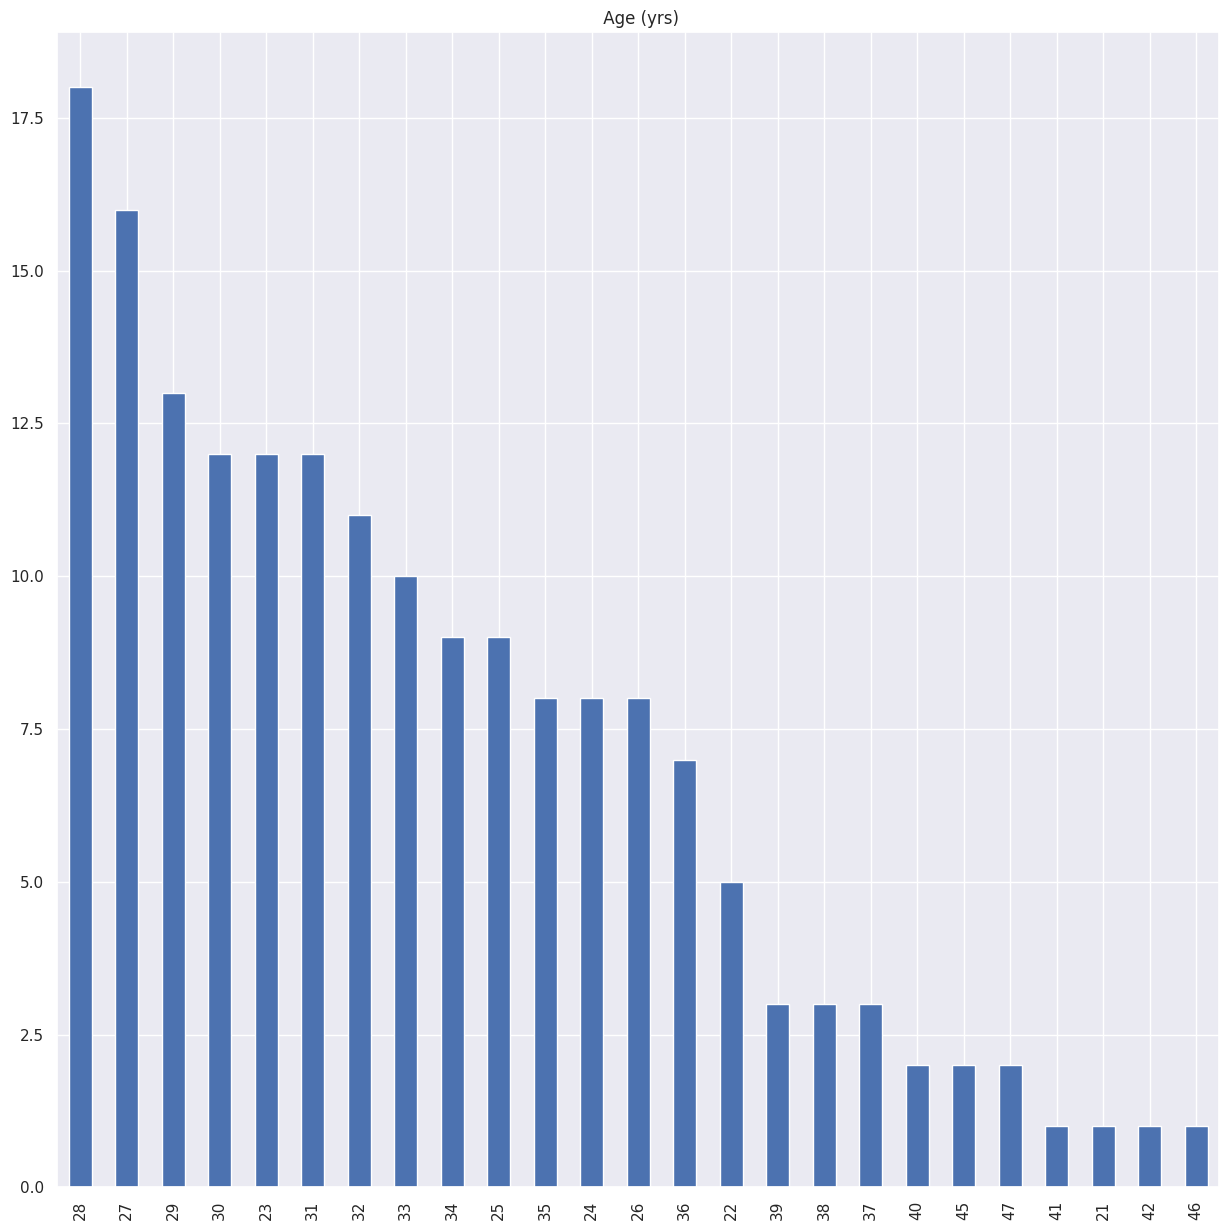

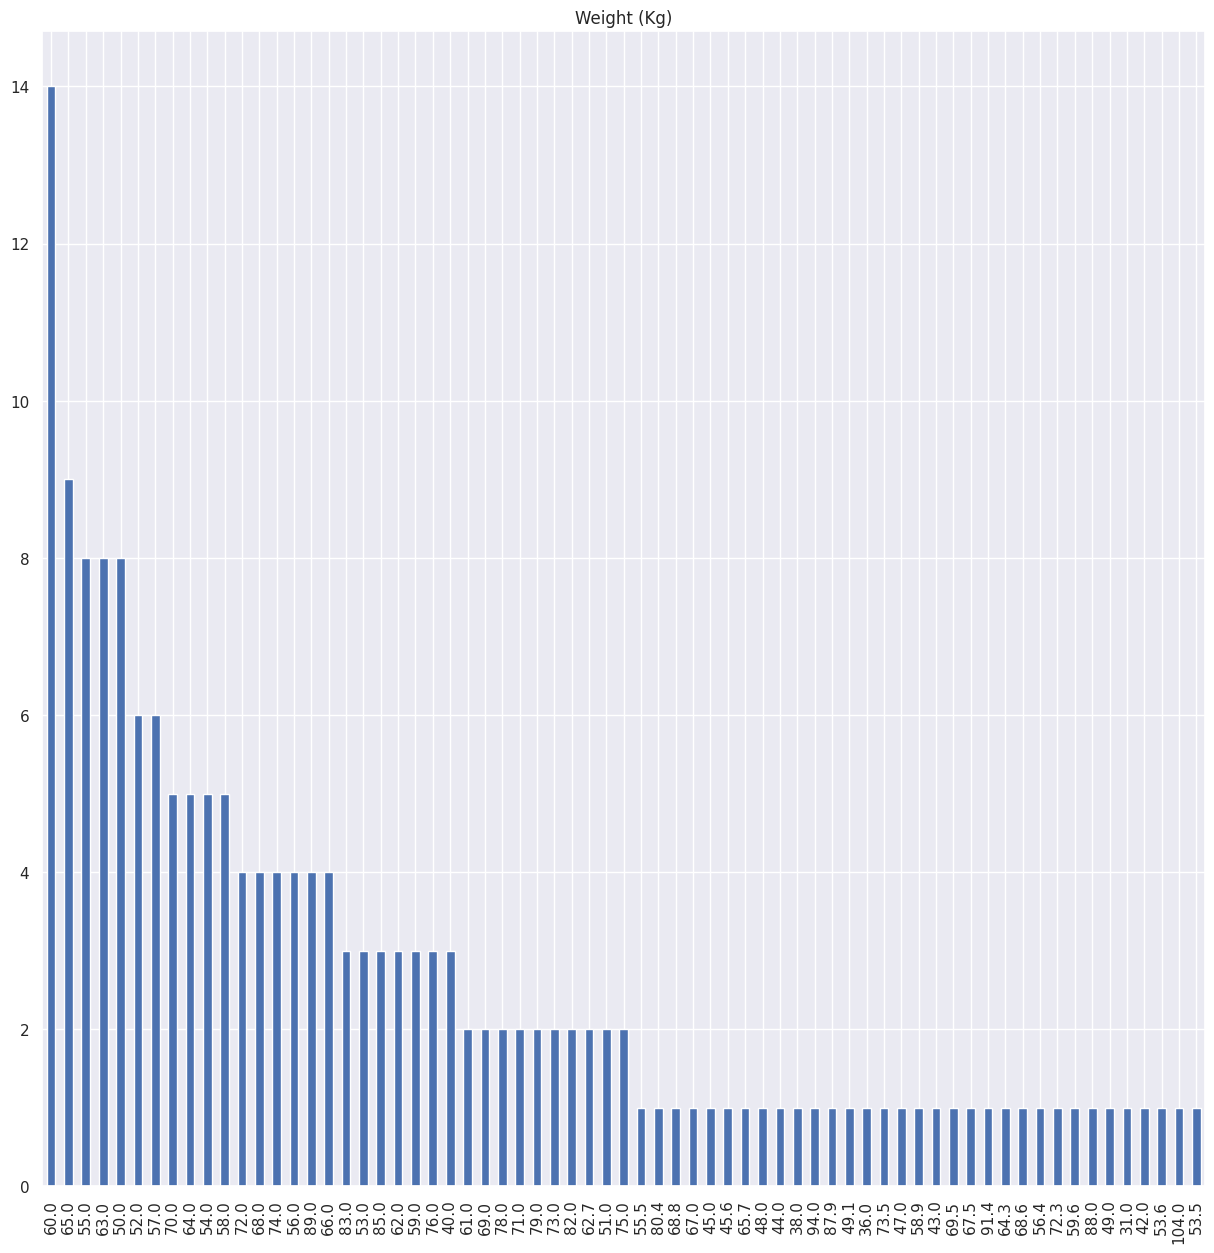

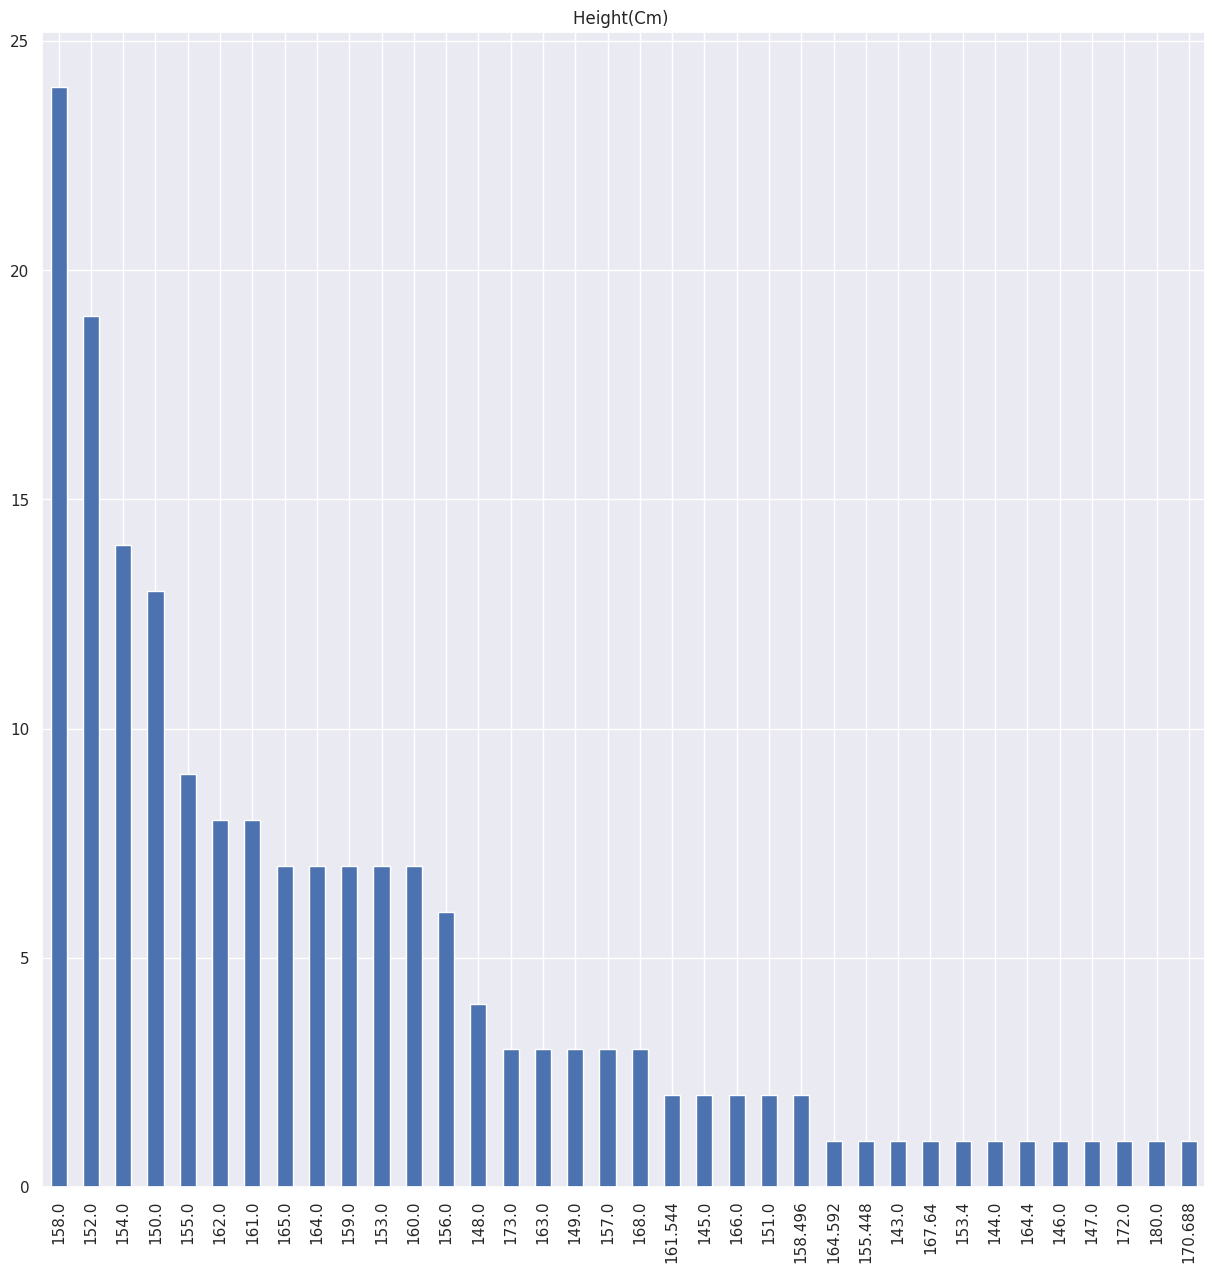

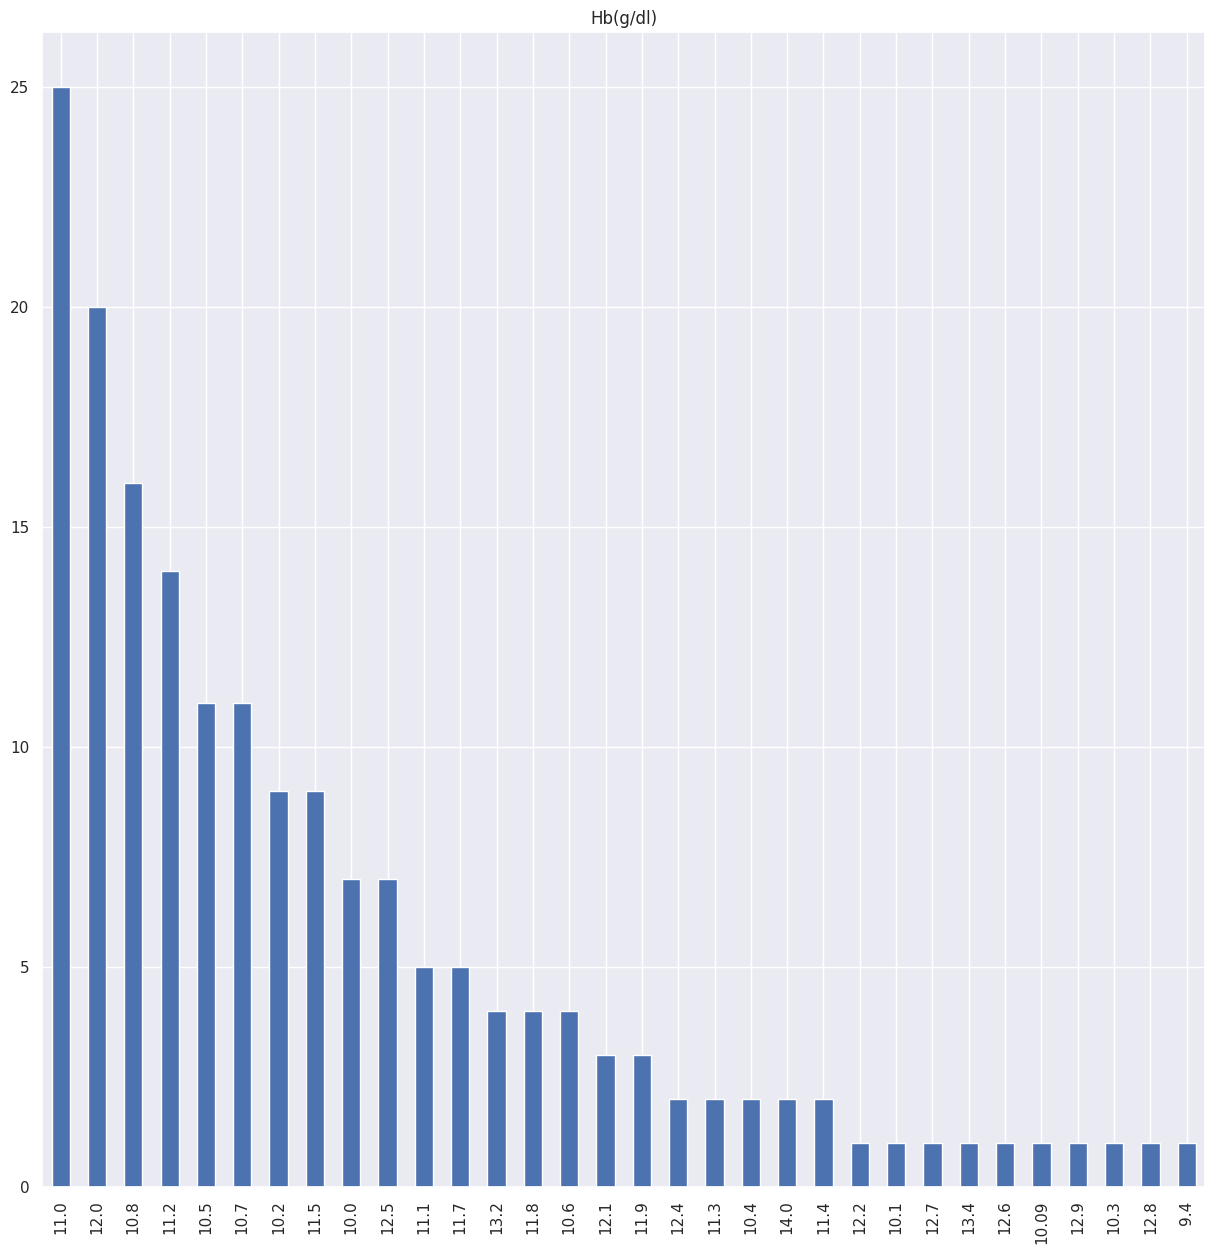

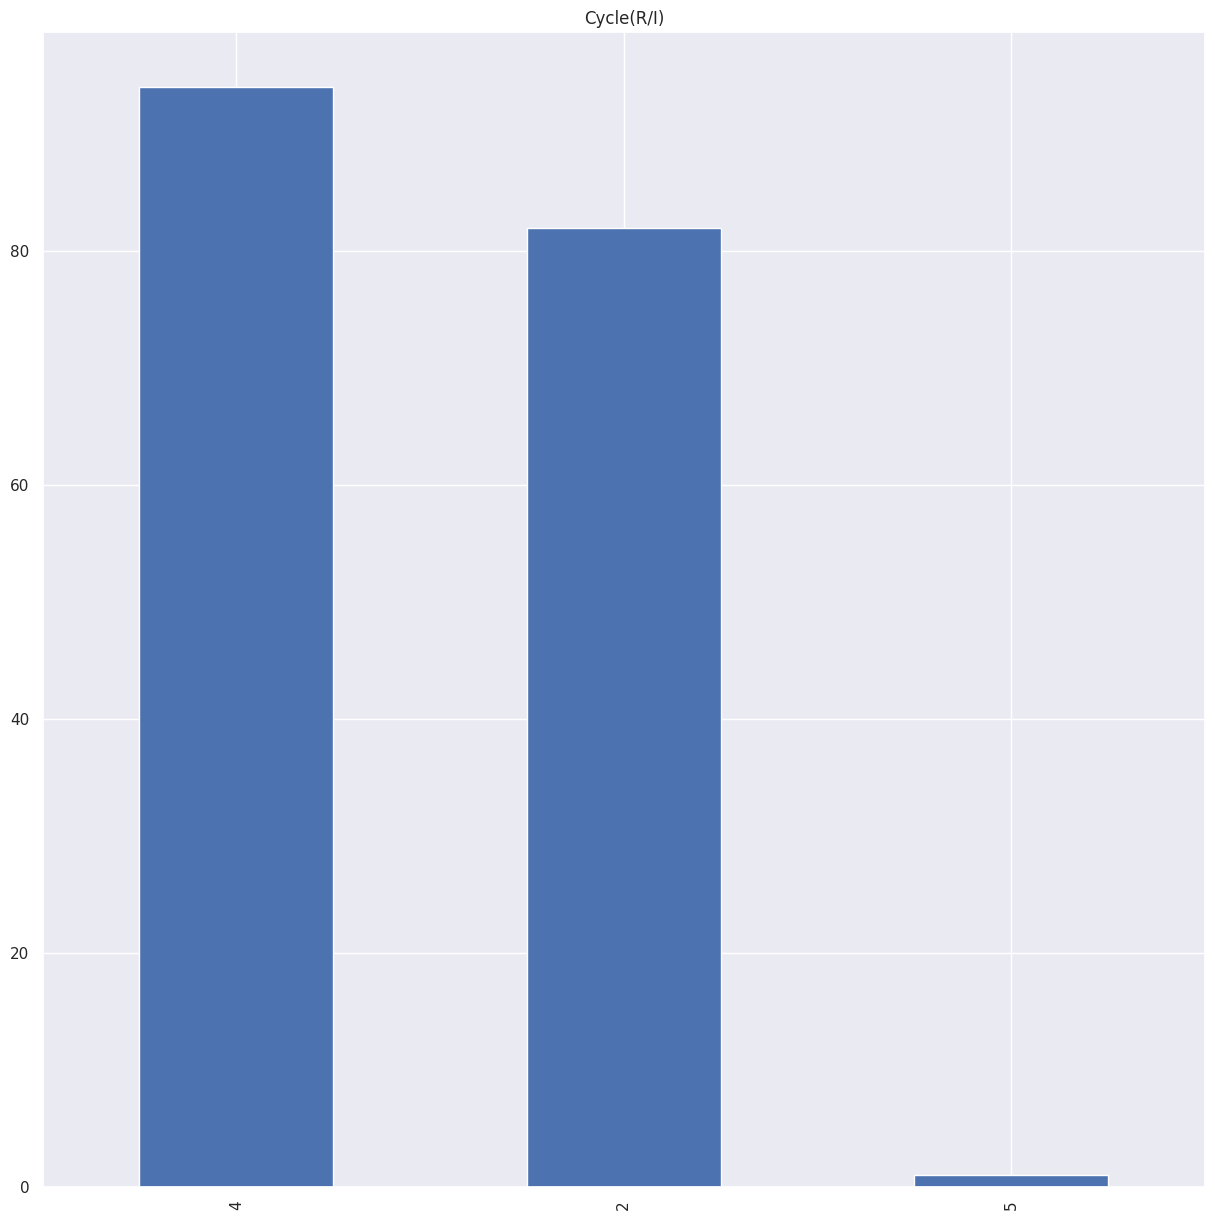

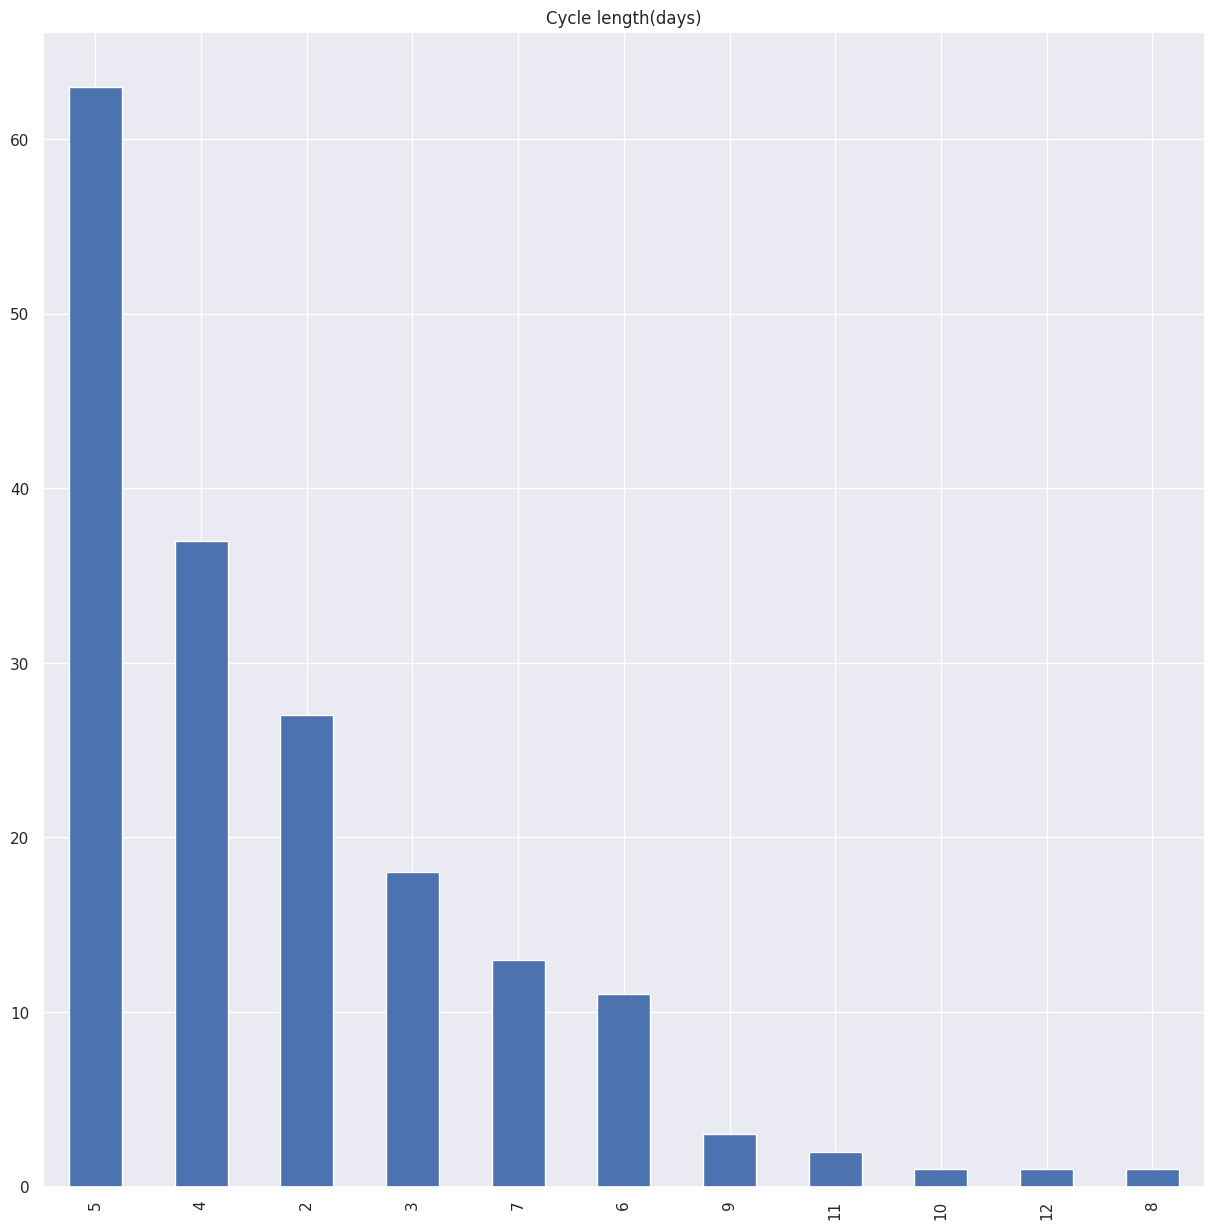

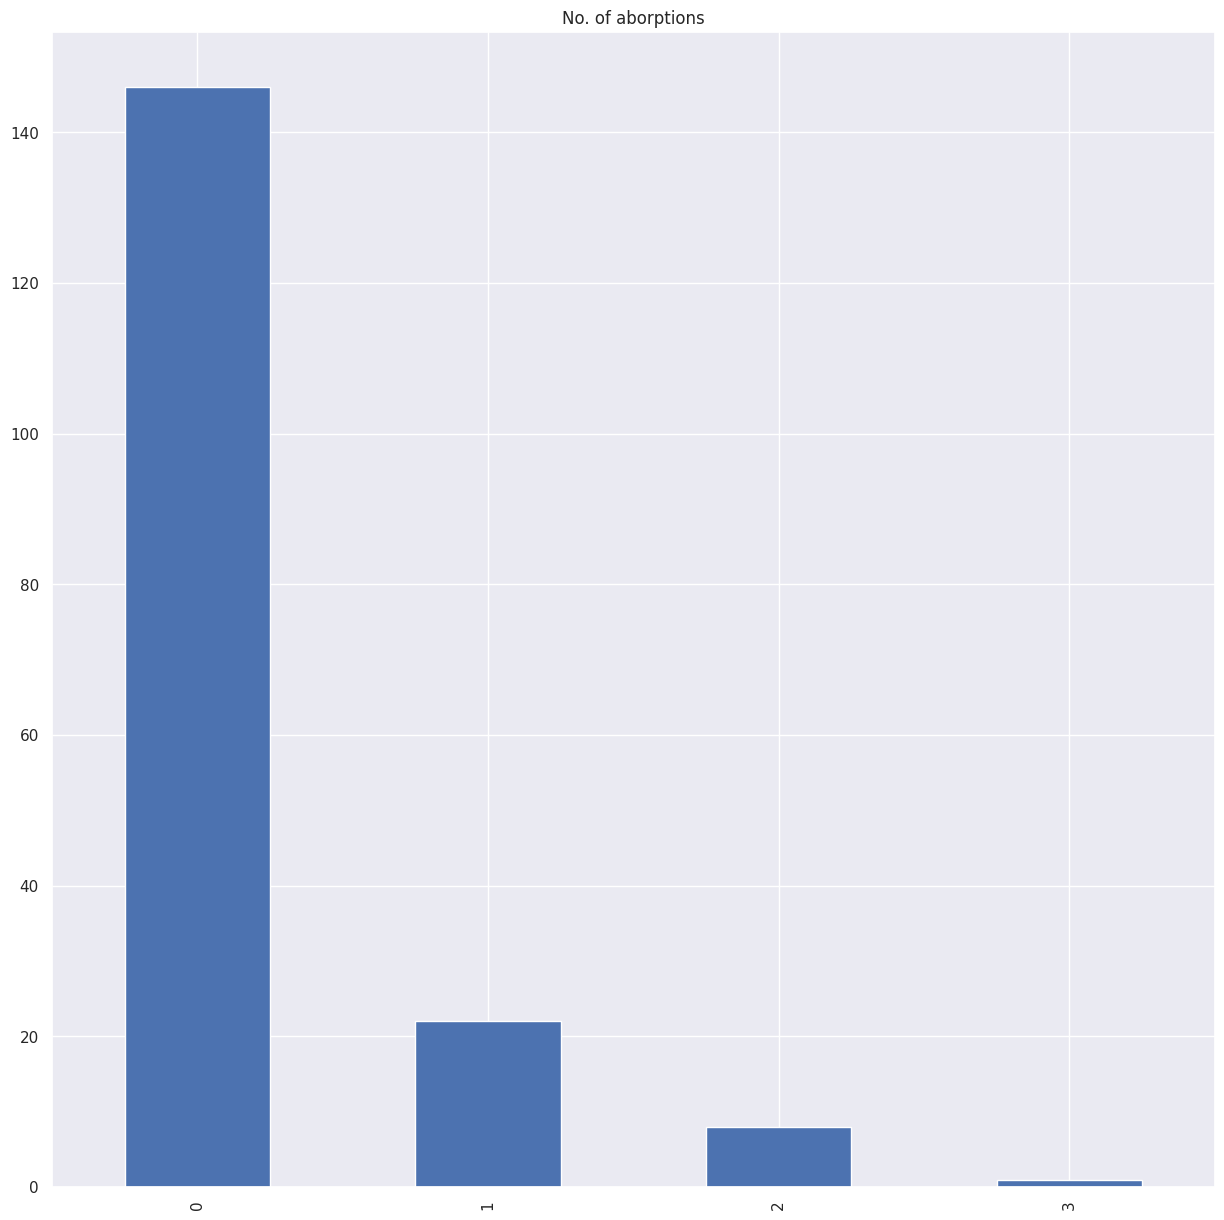

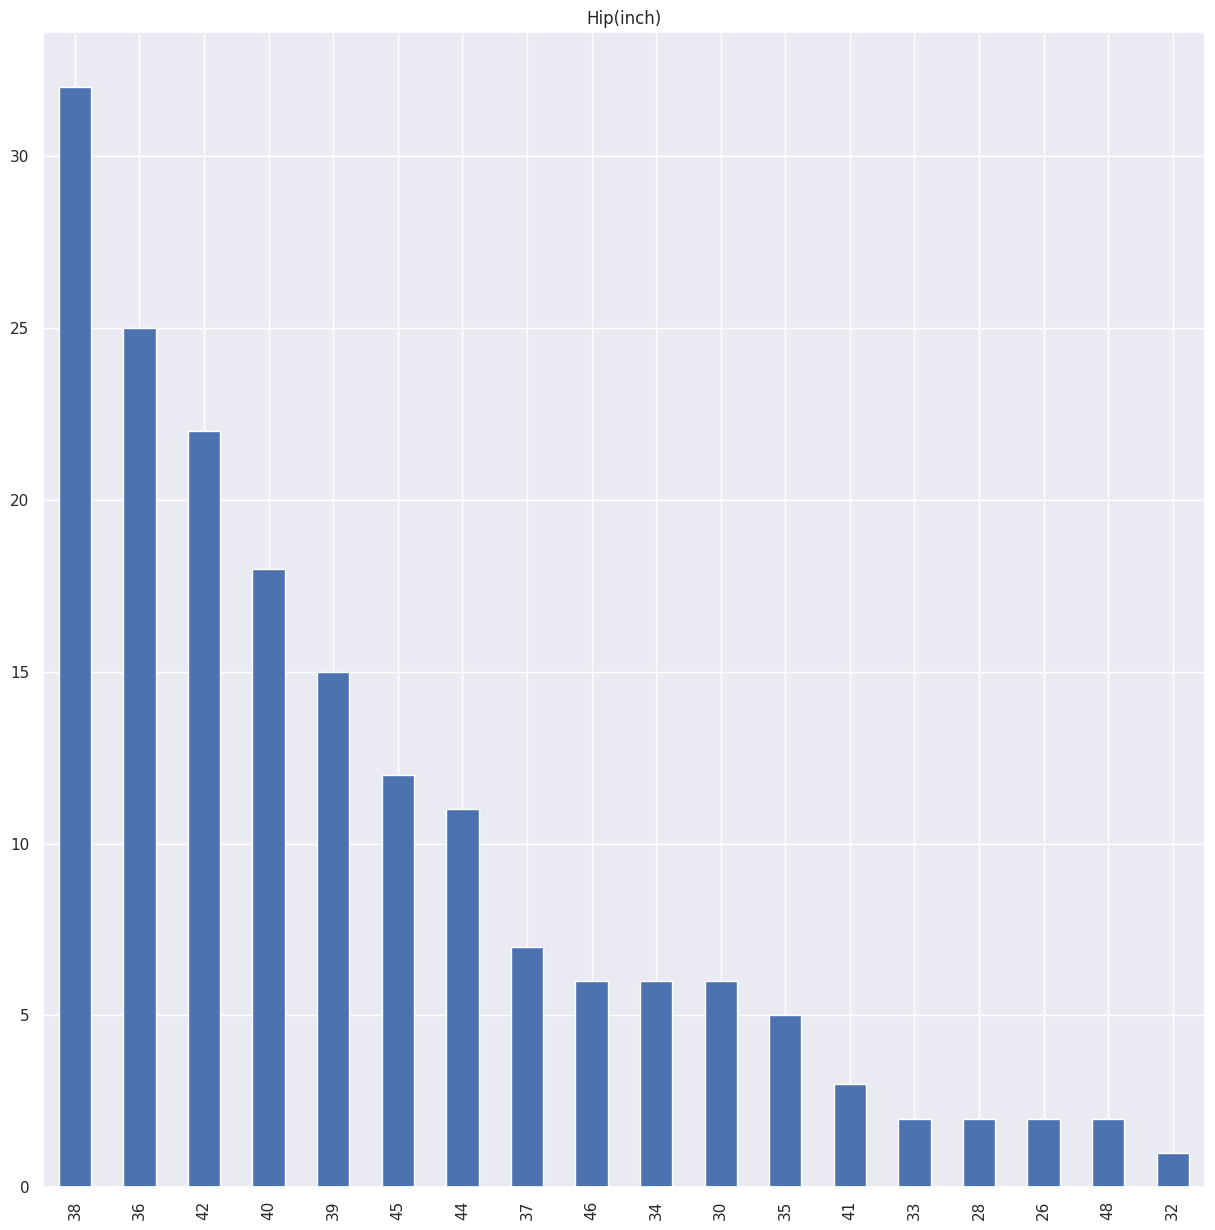

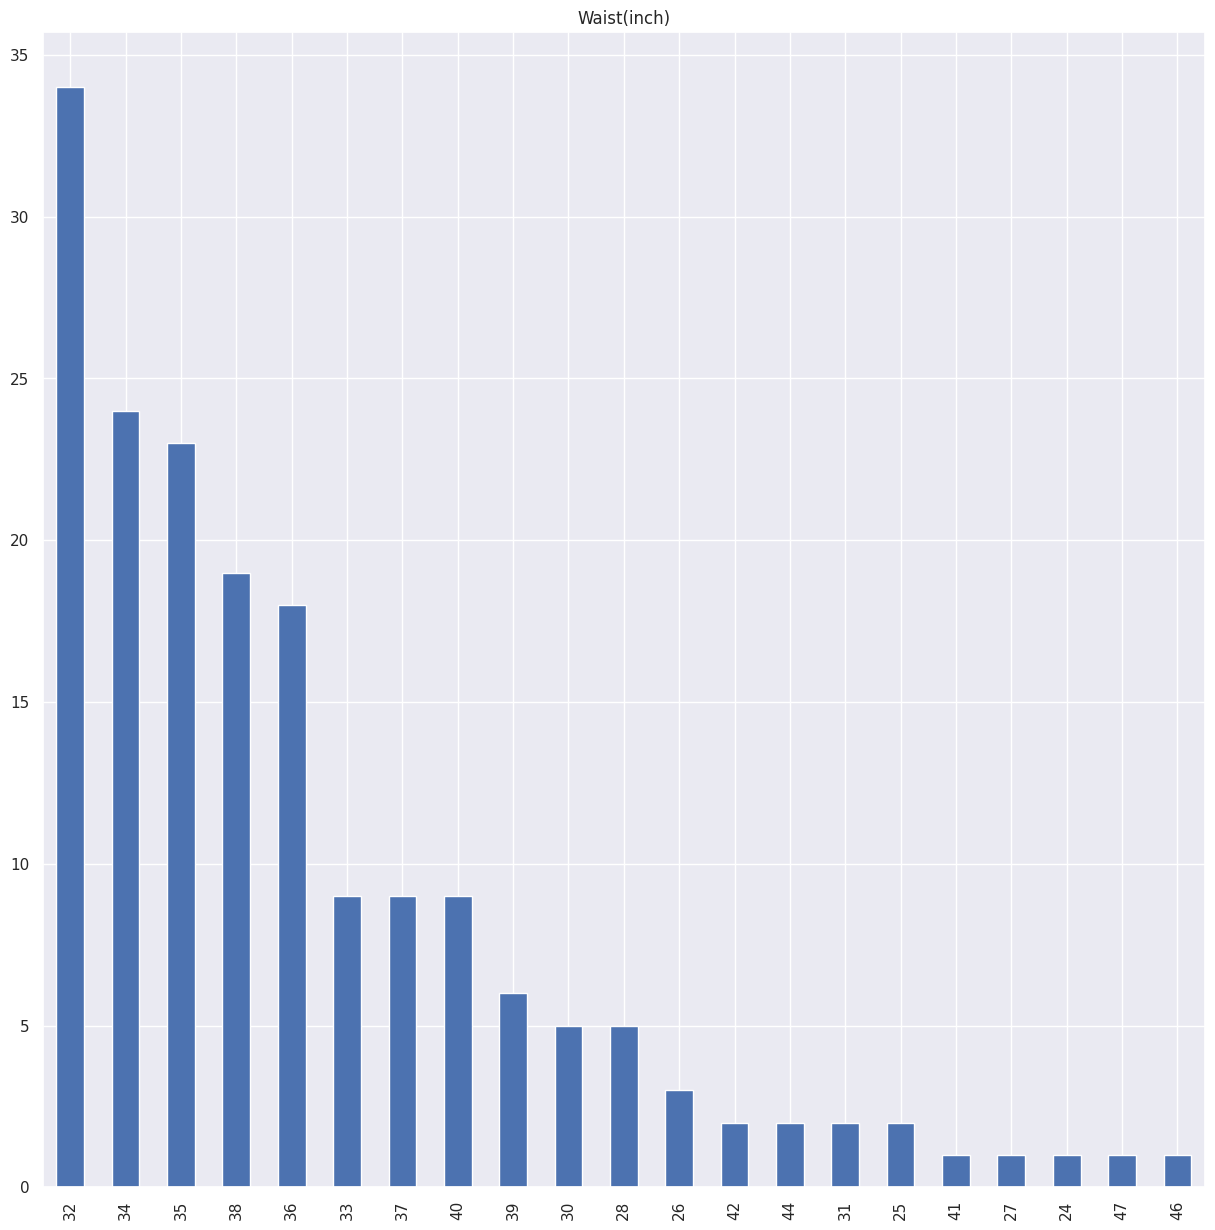

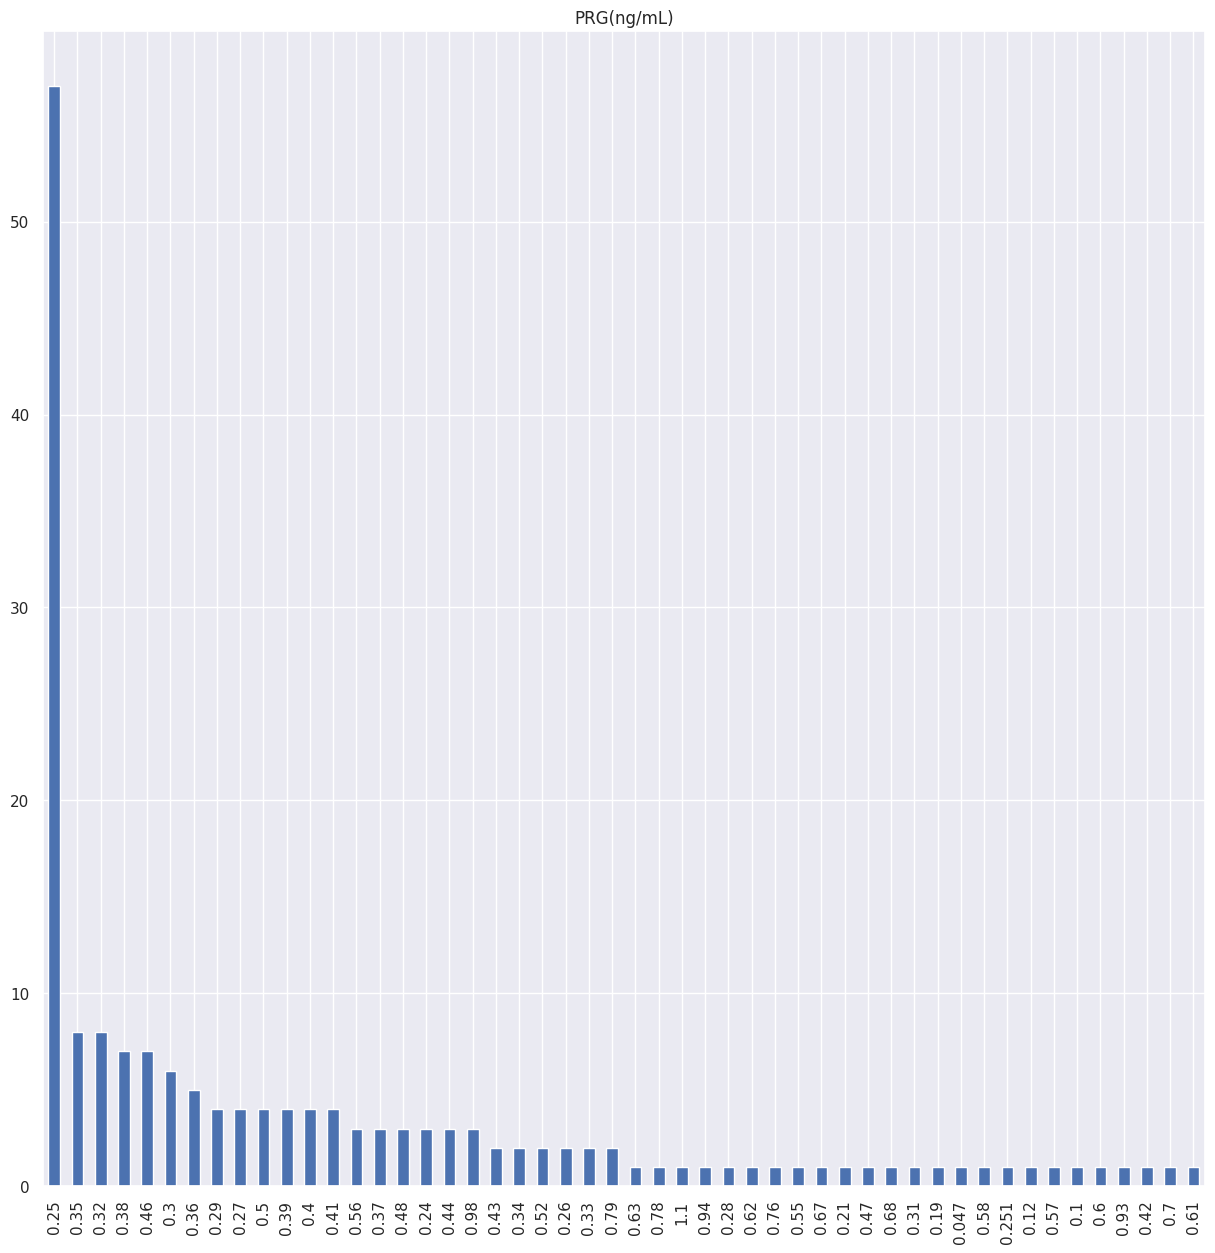

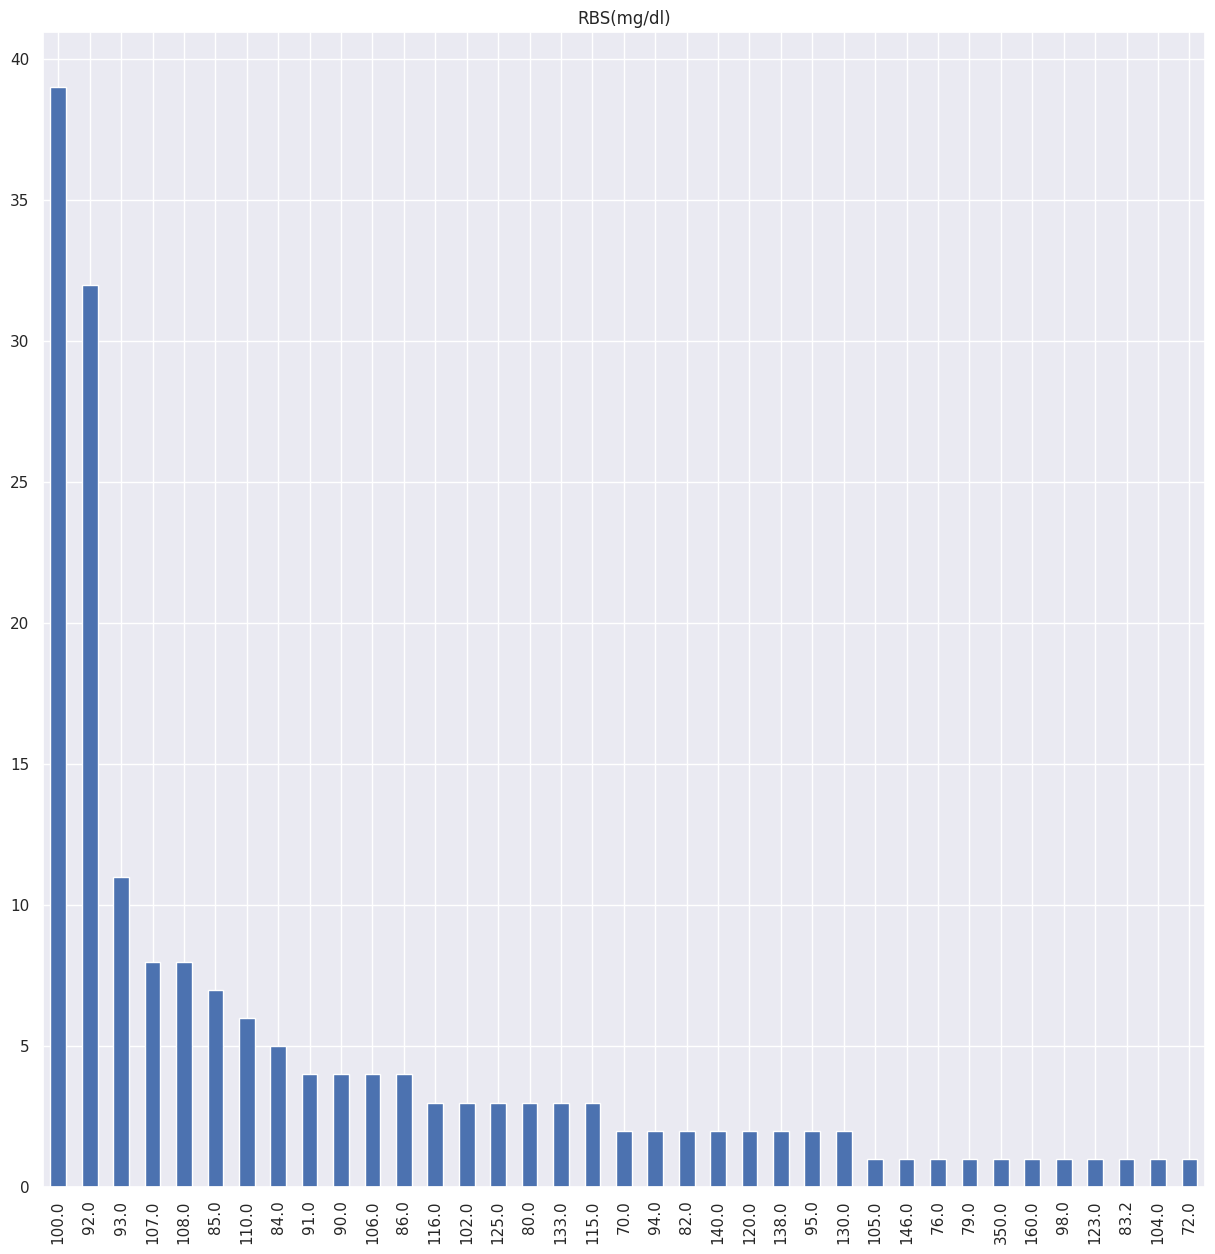

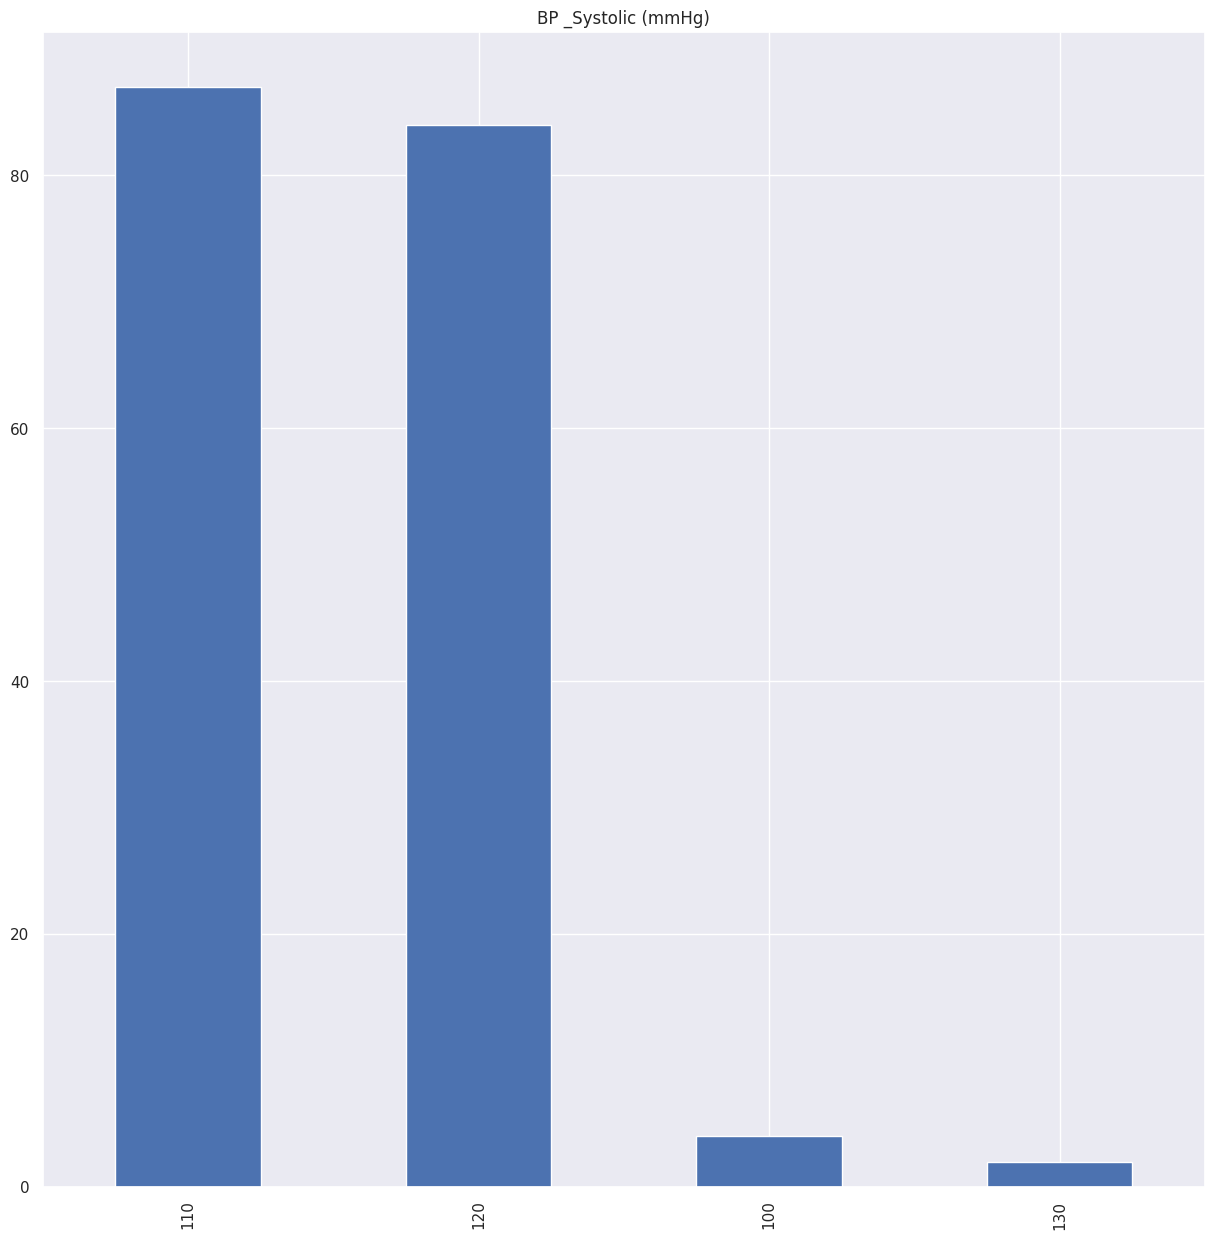

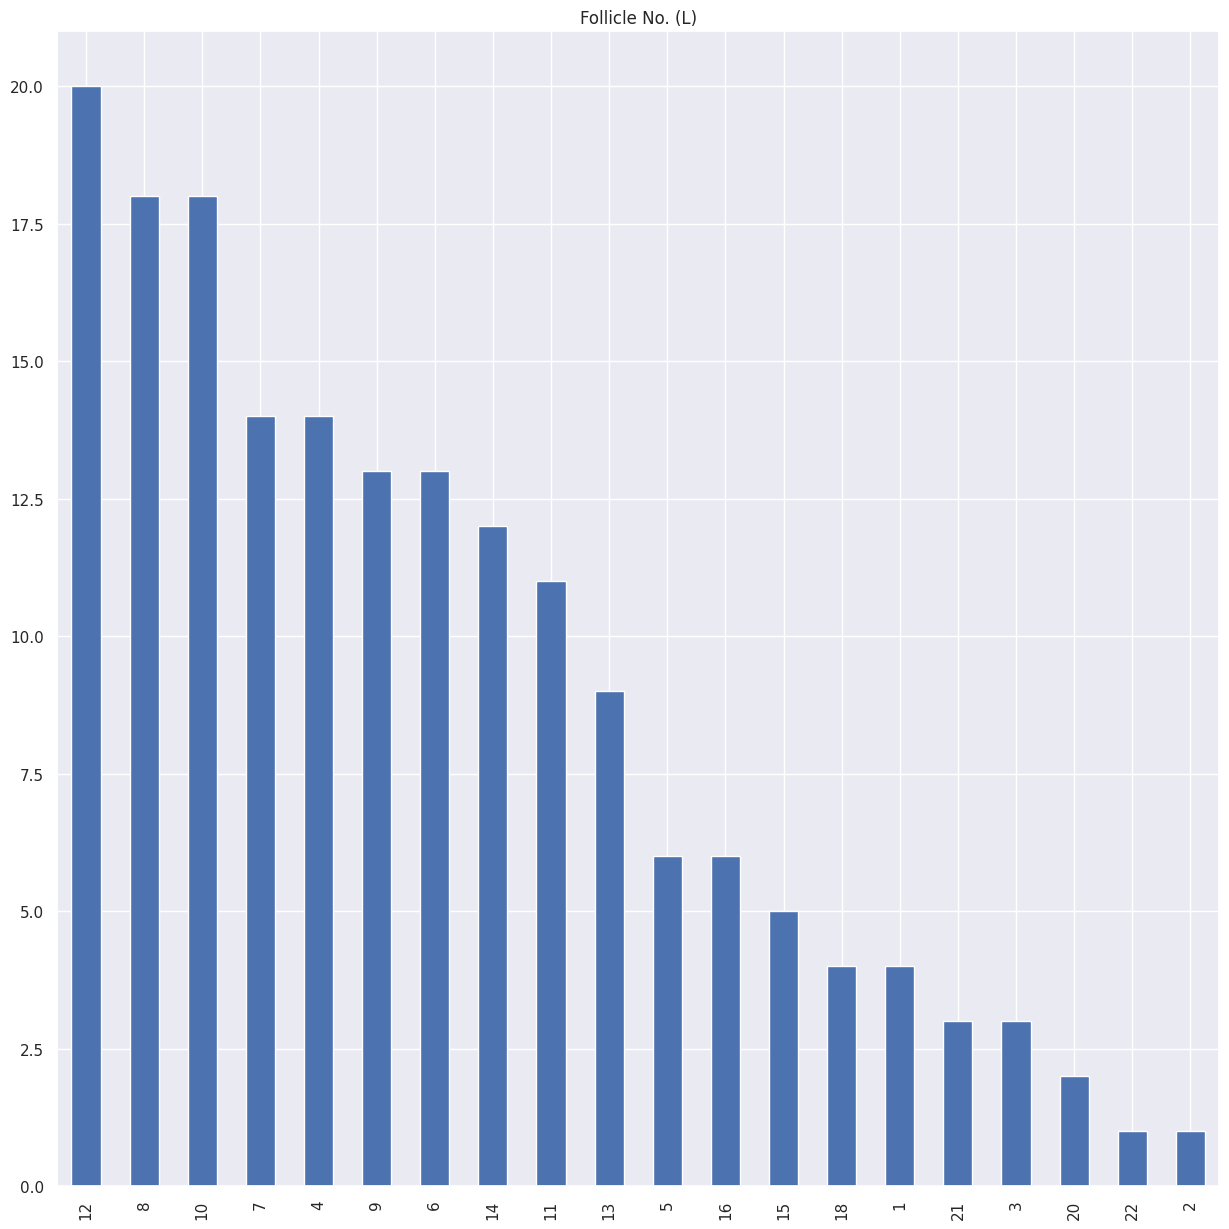

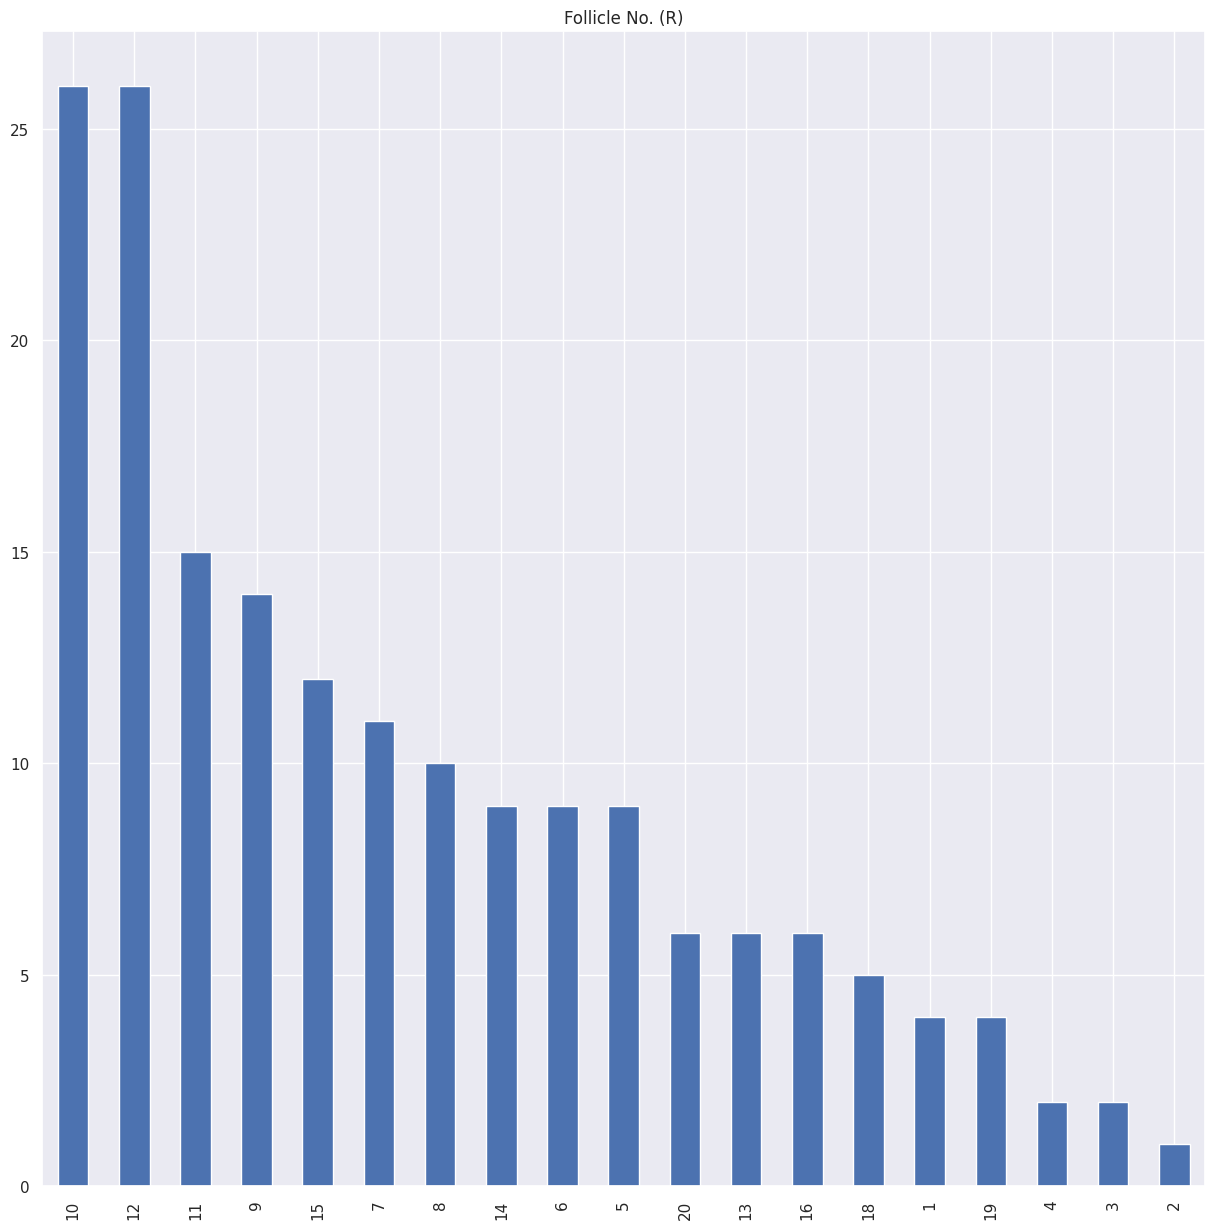

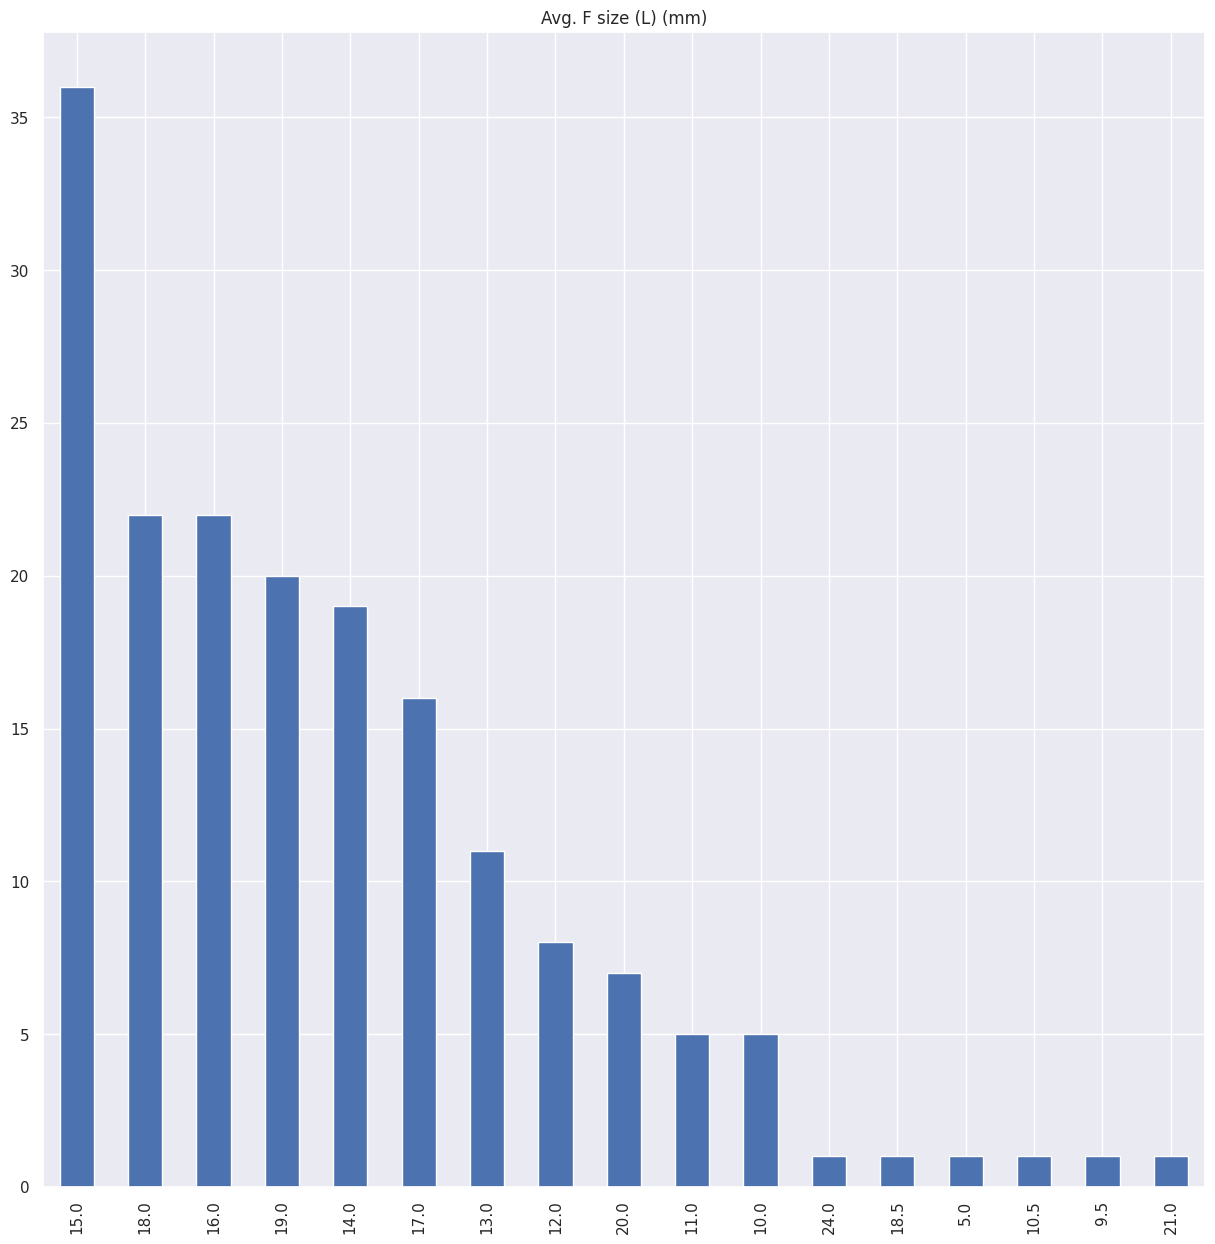

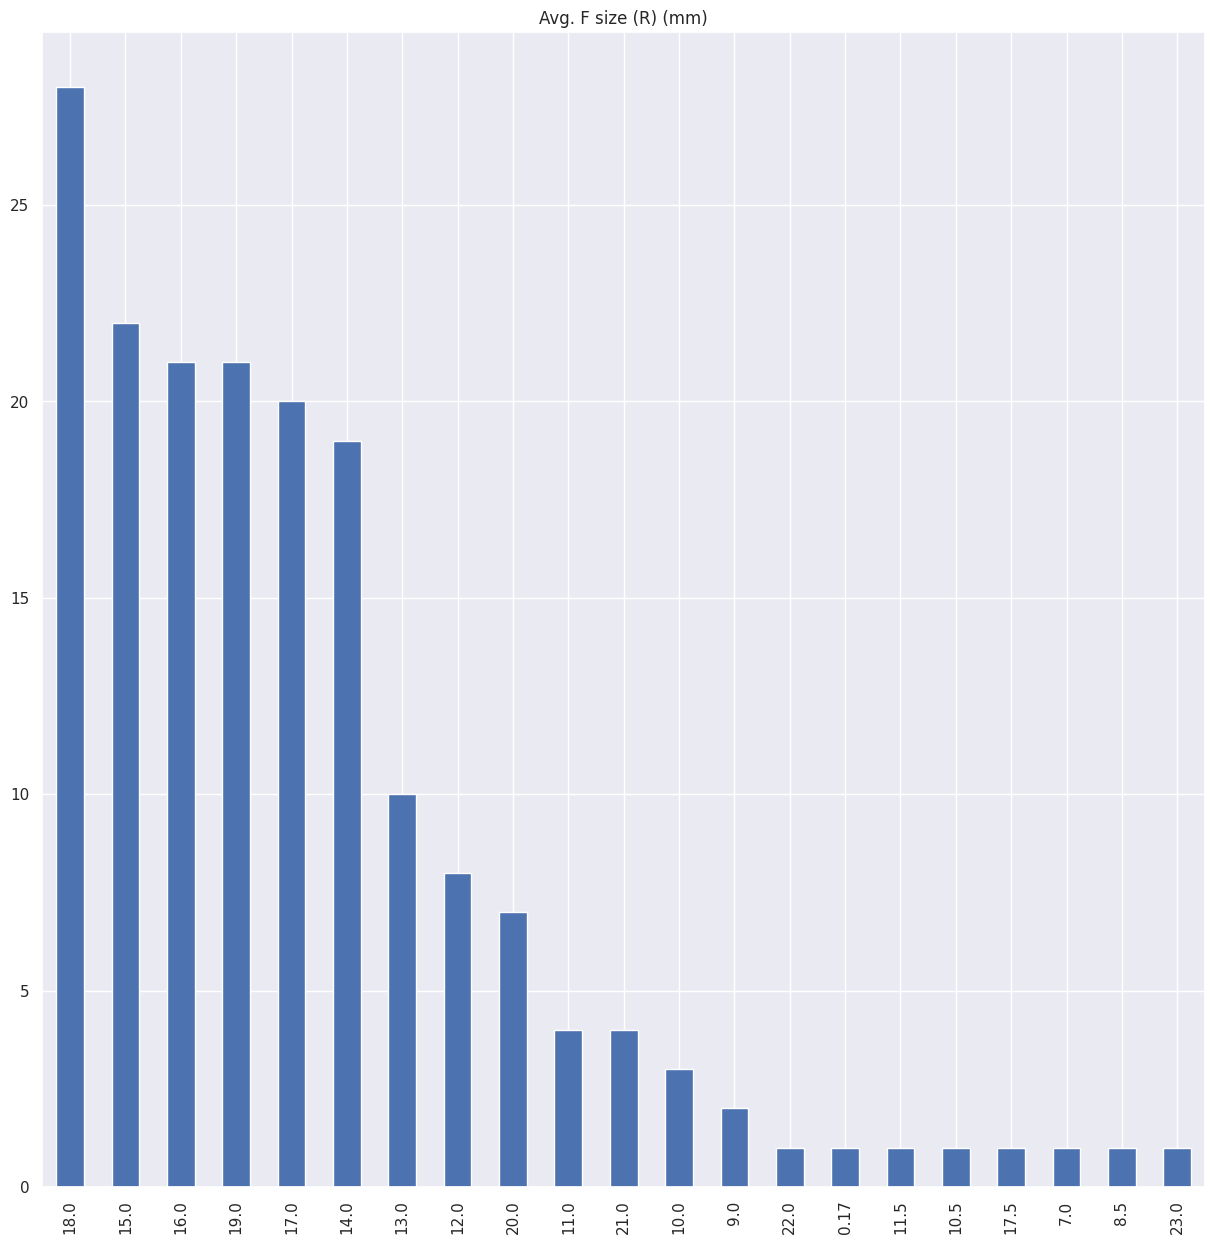

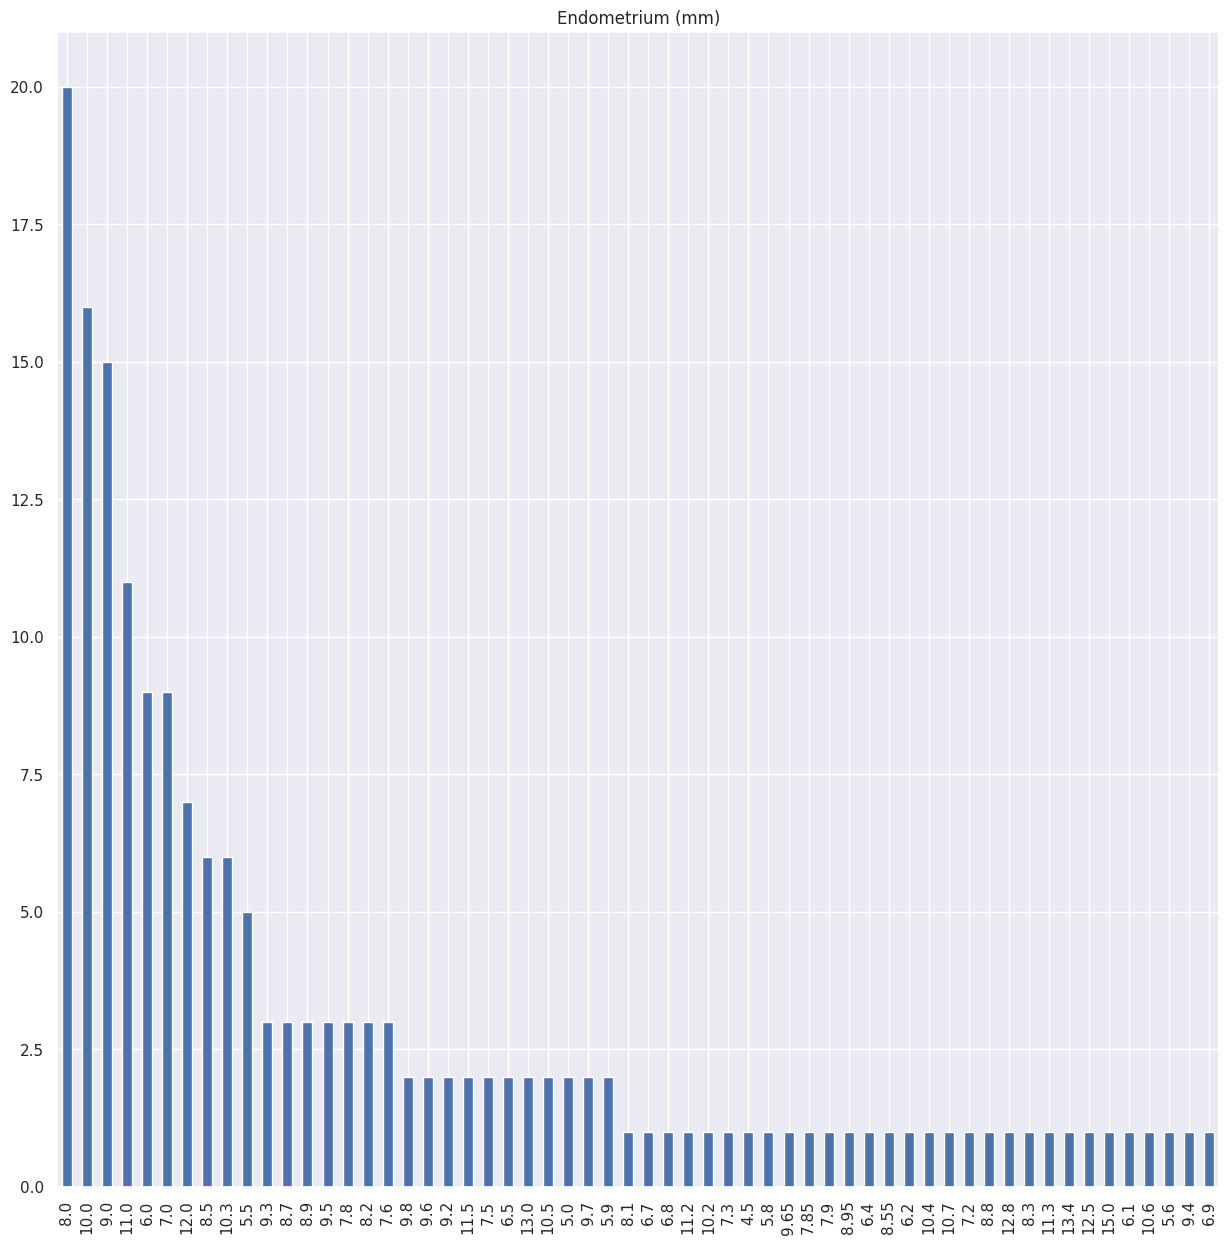

In [ ]:
import matplotlib.pyplot as plt #for plotting simple graphs
import seaborn as sns #another plotting library
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  final[final['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

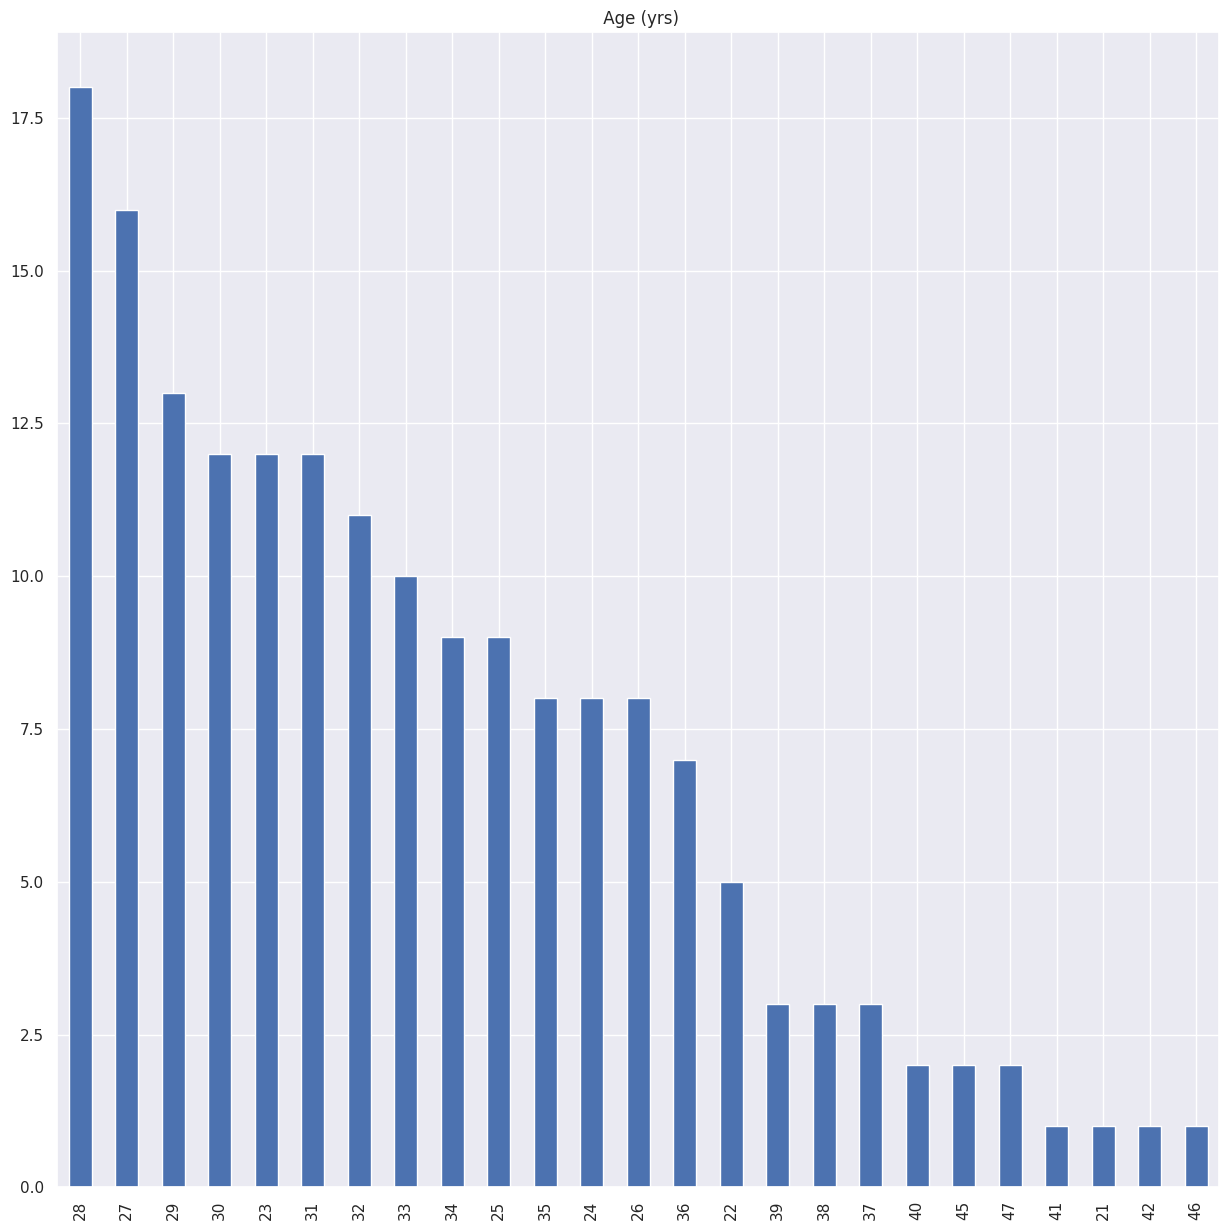

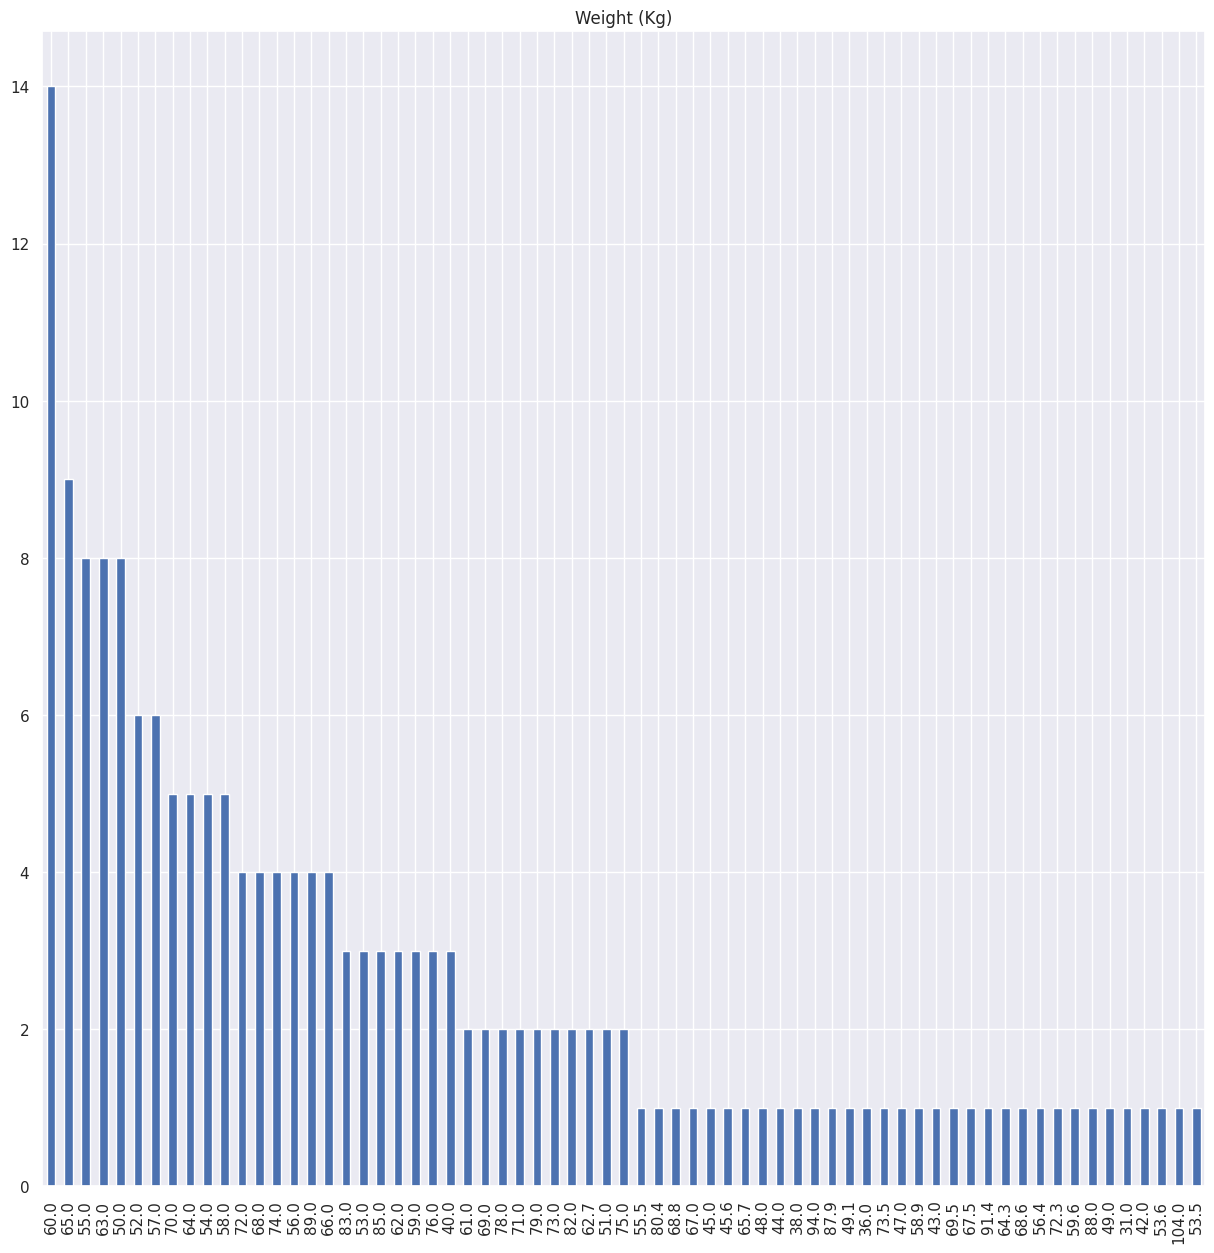

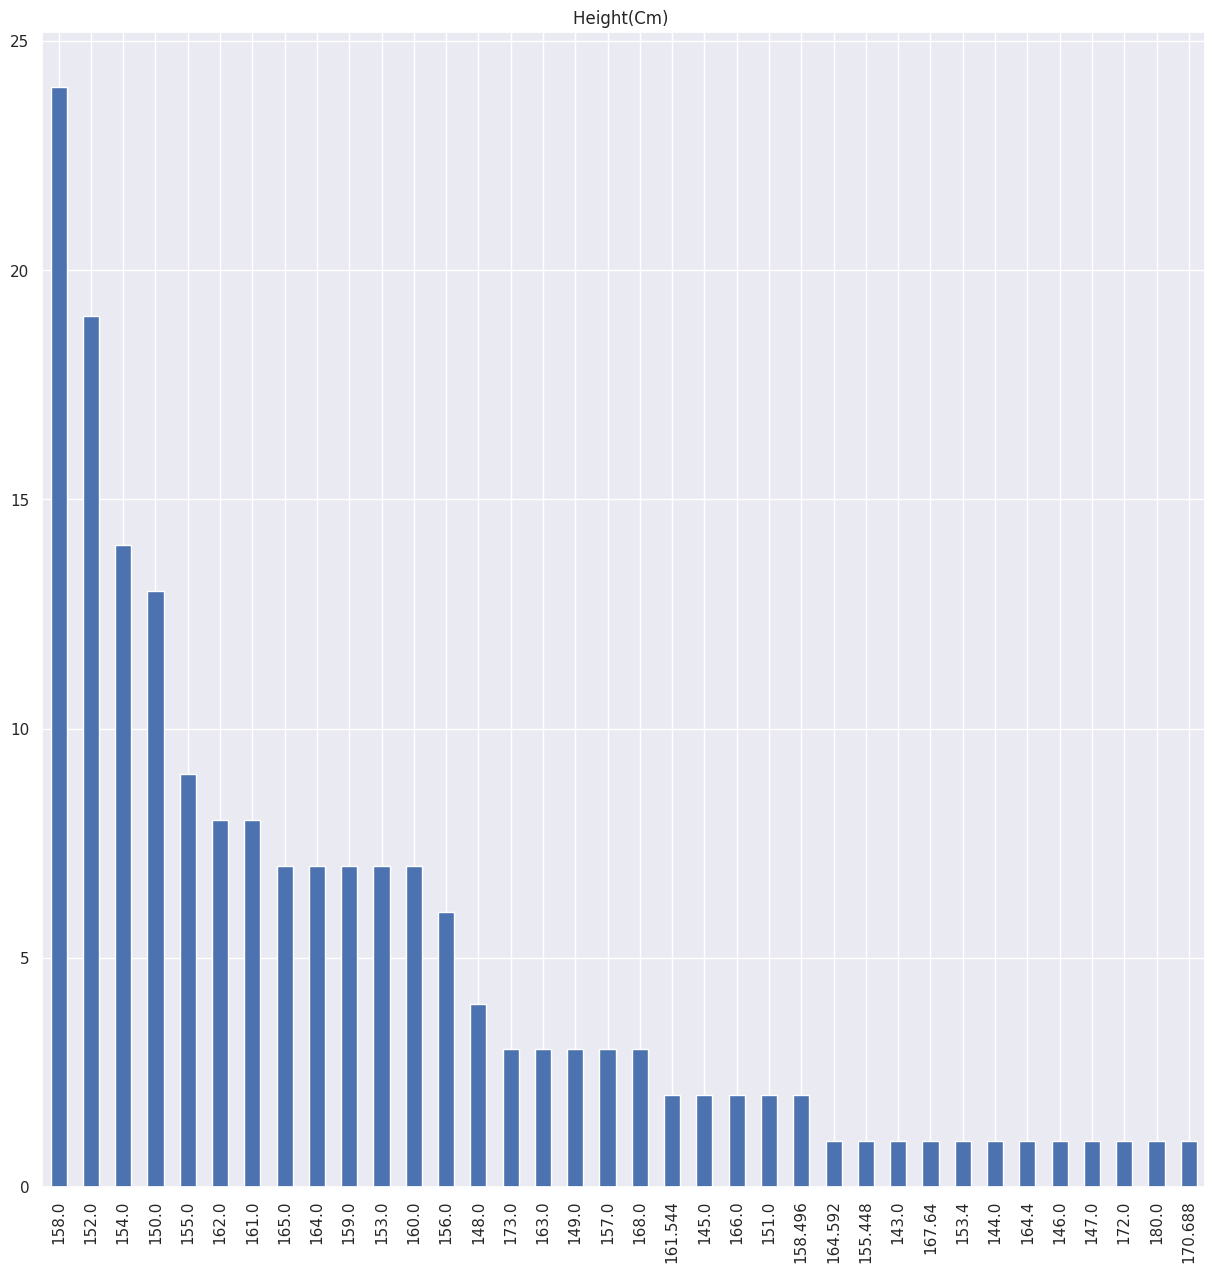

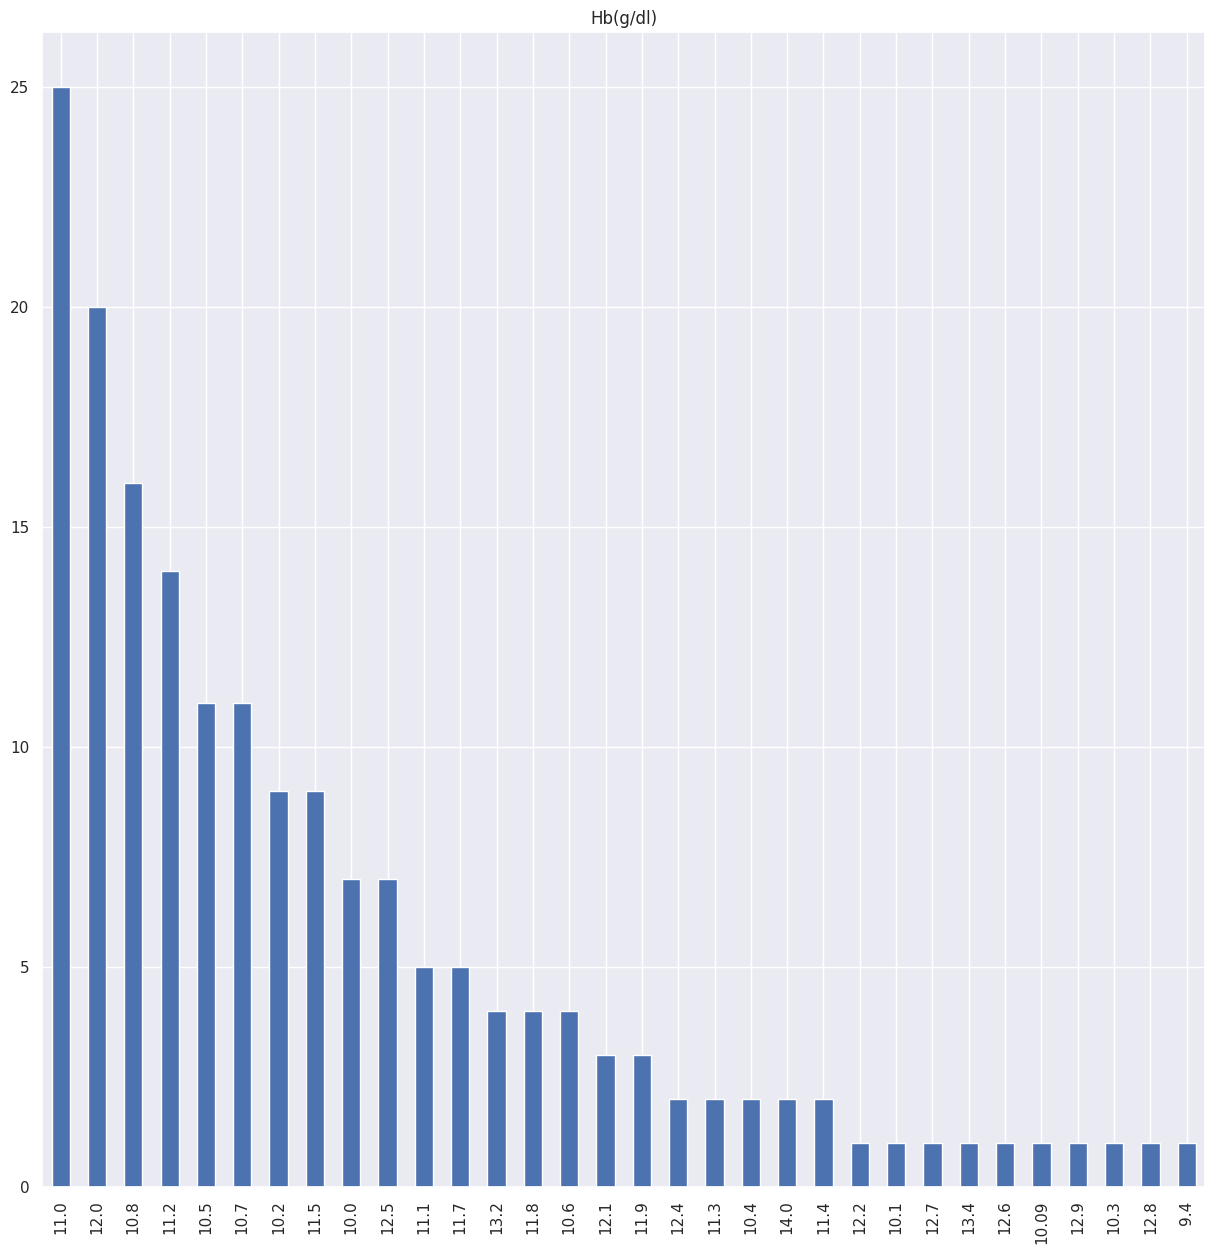

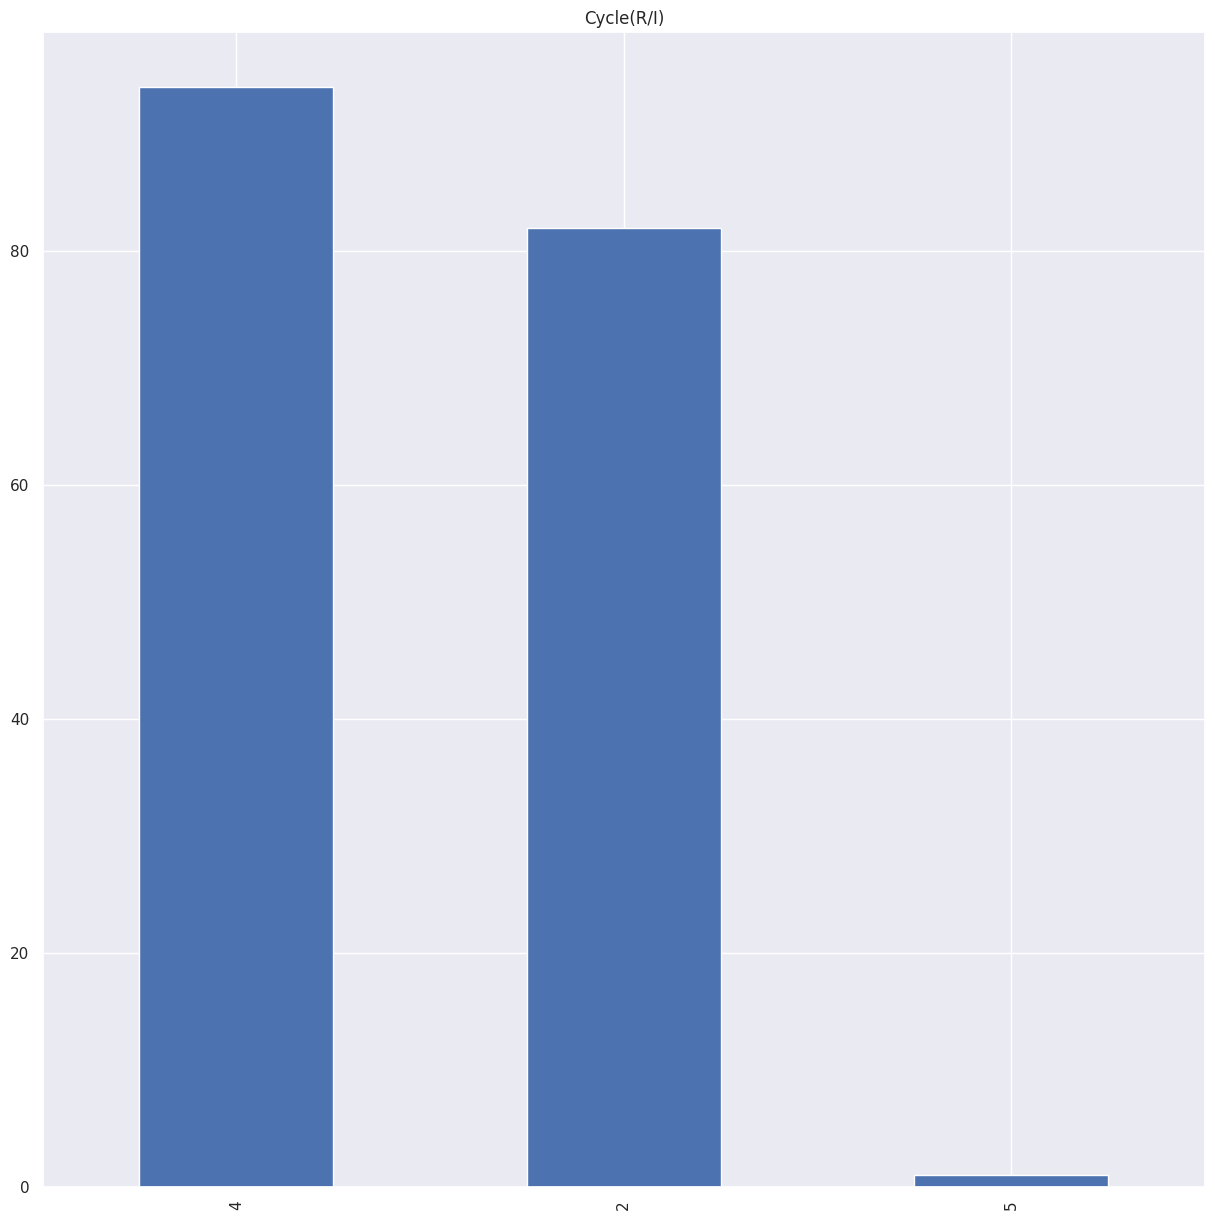

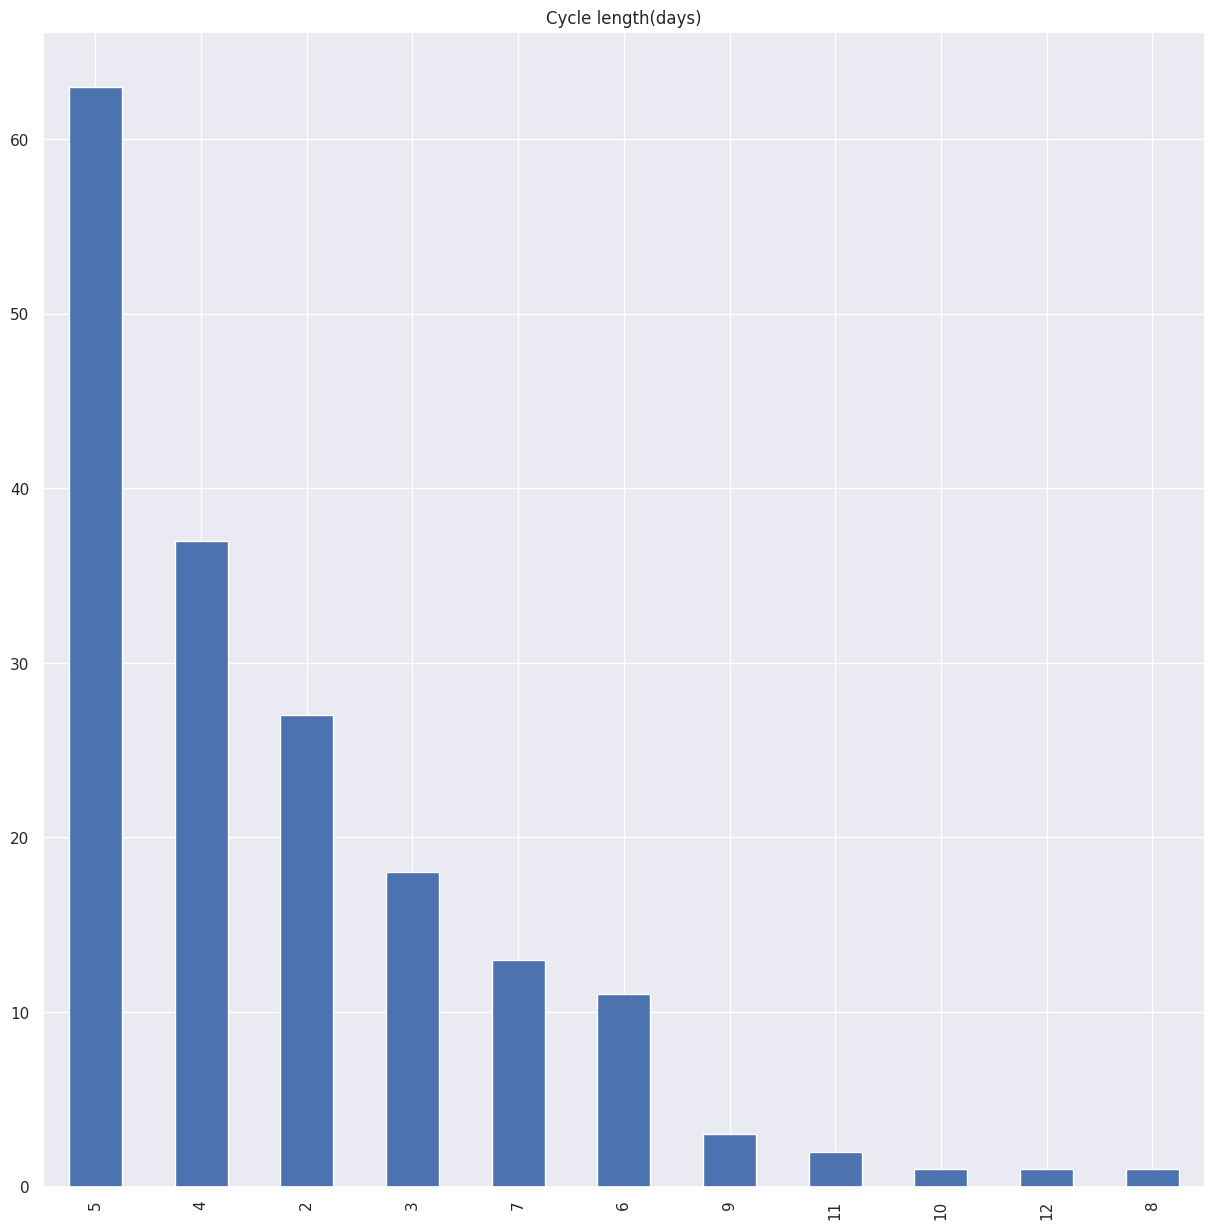

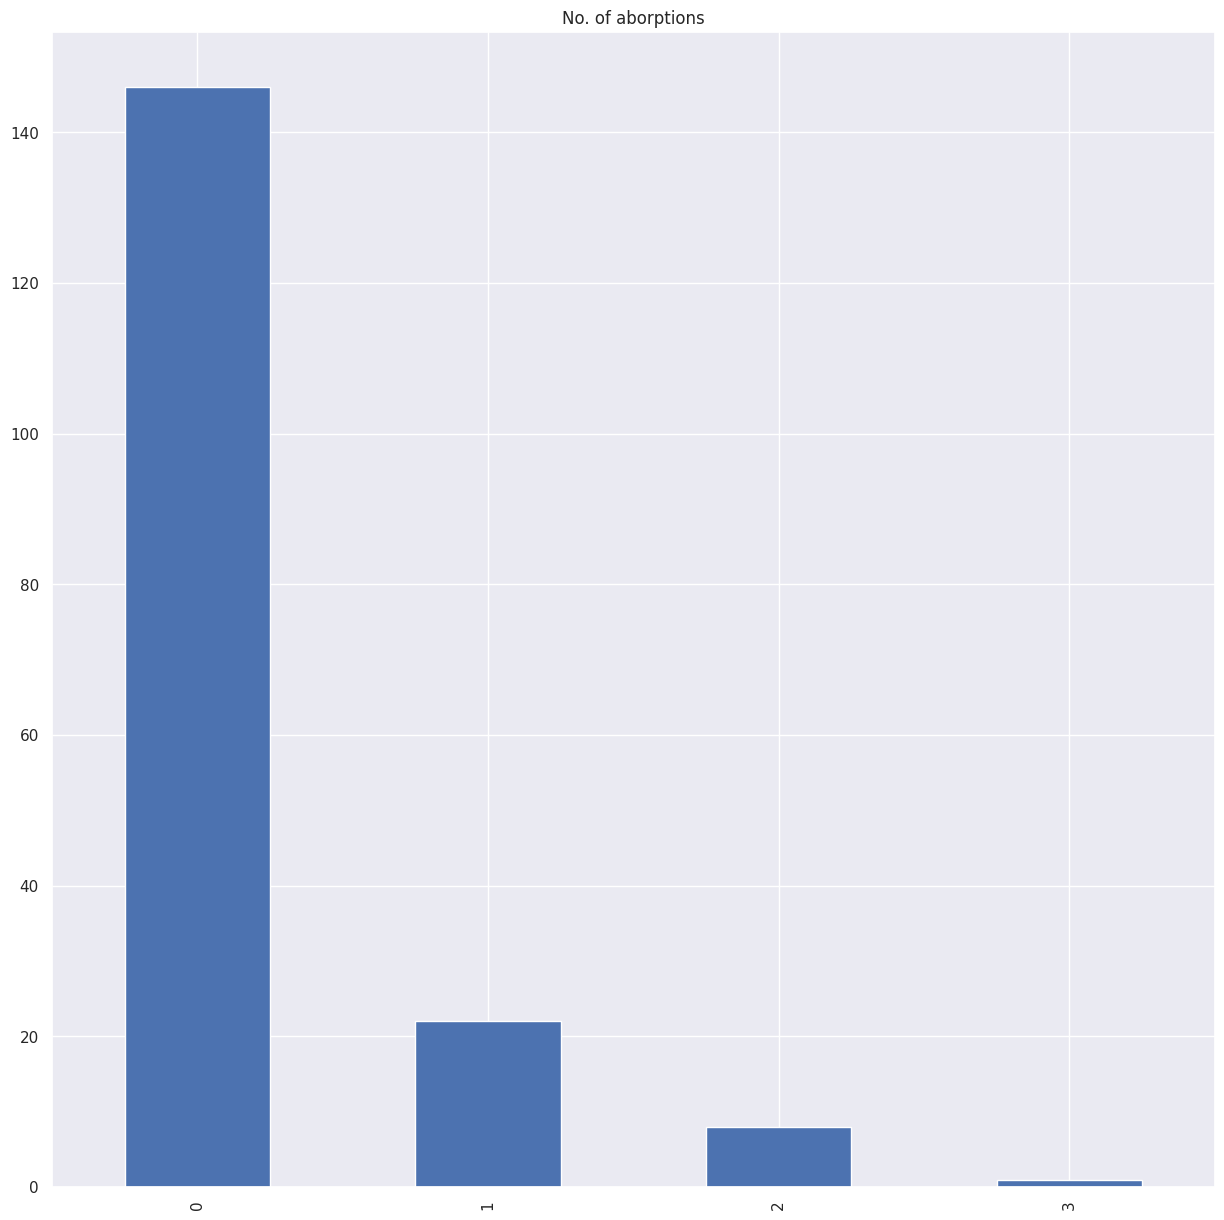

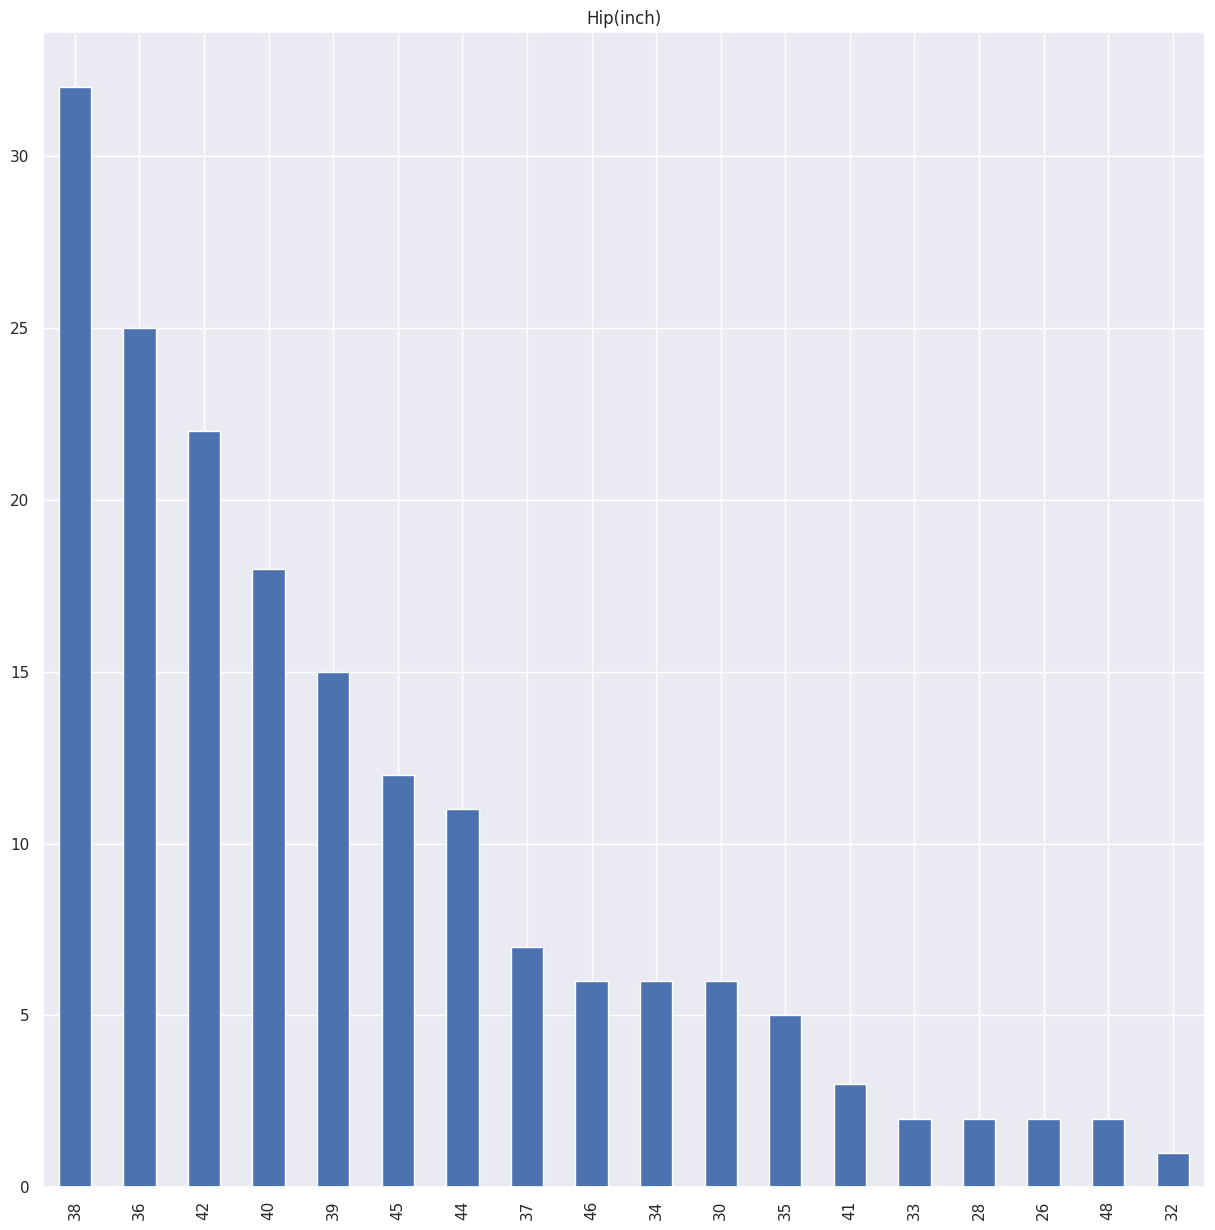

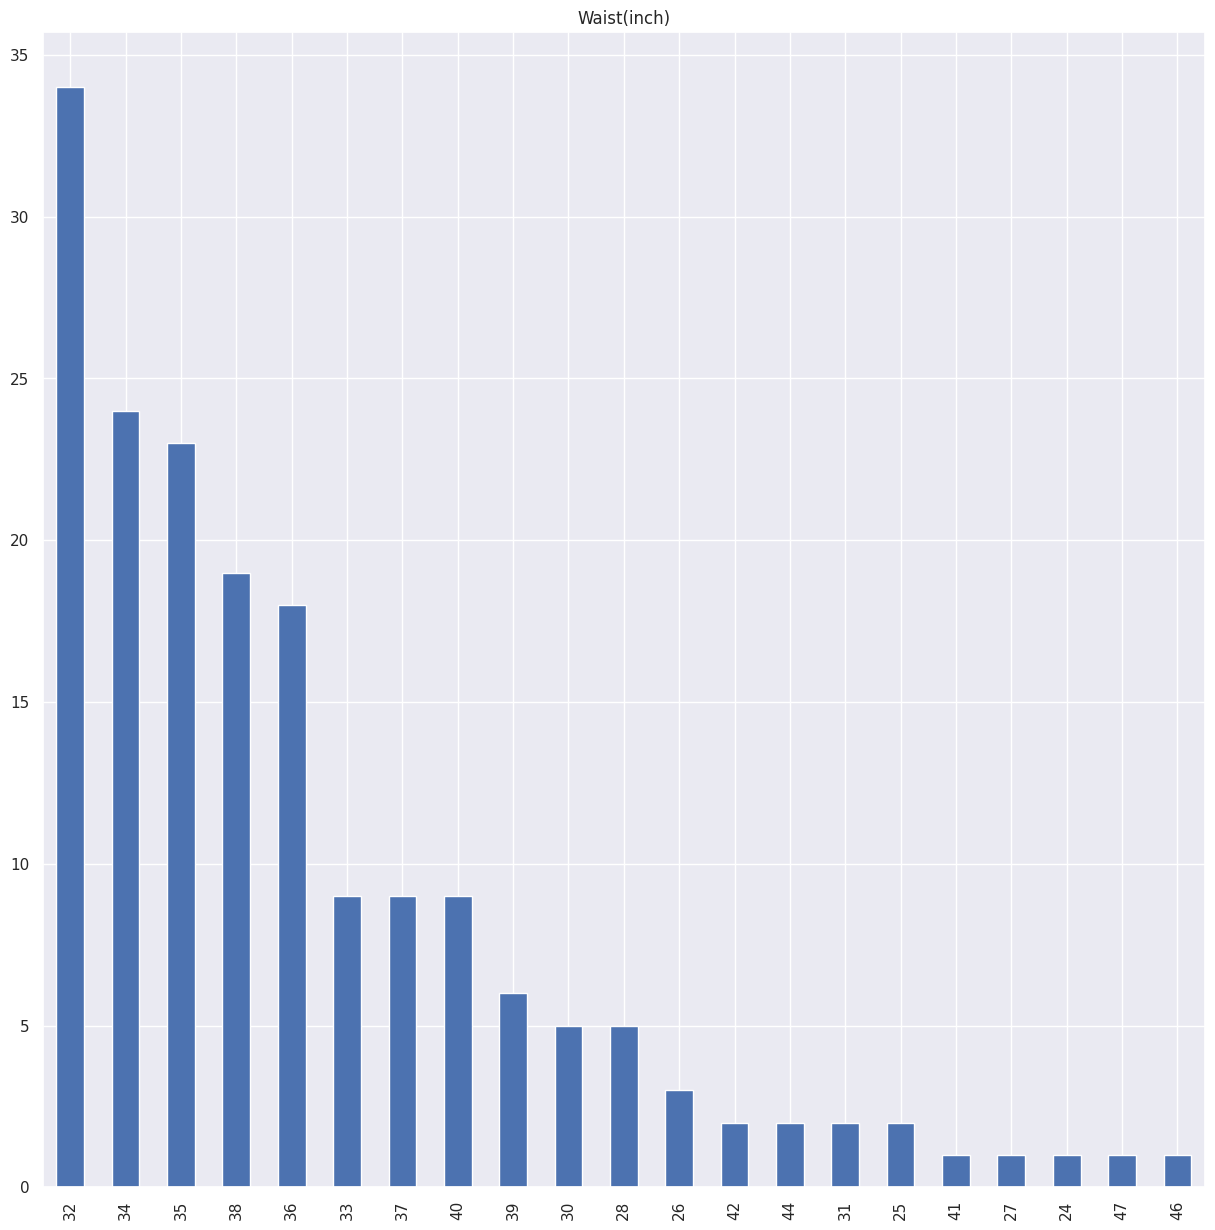

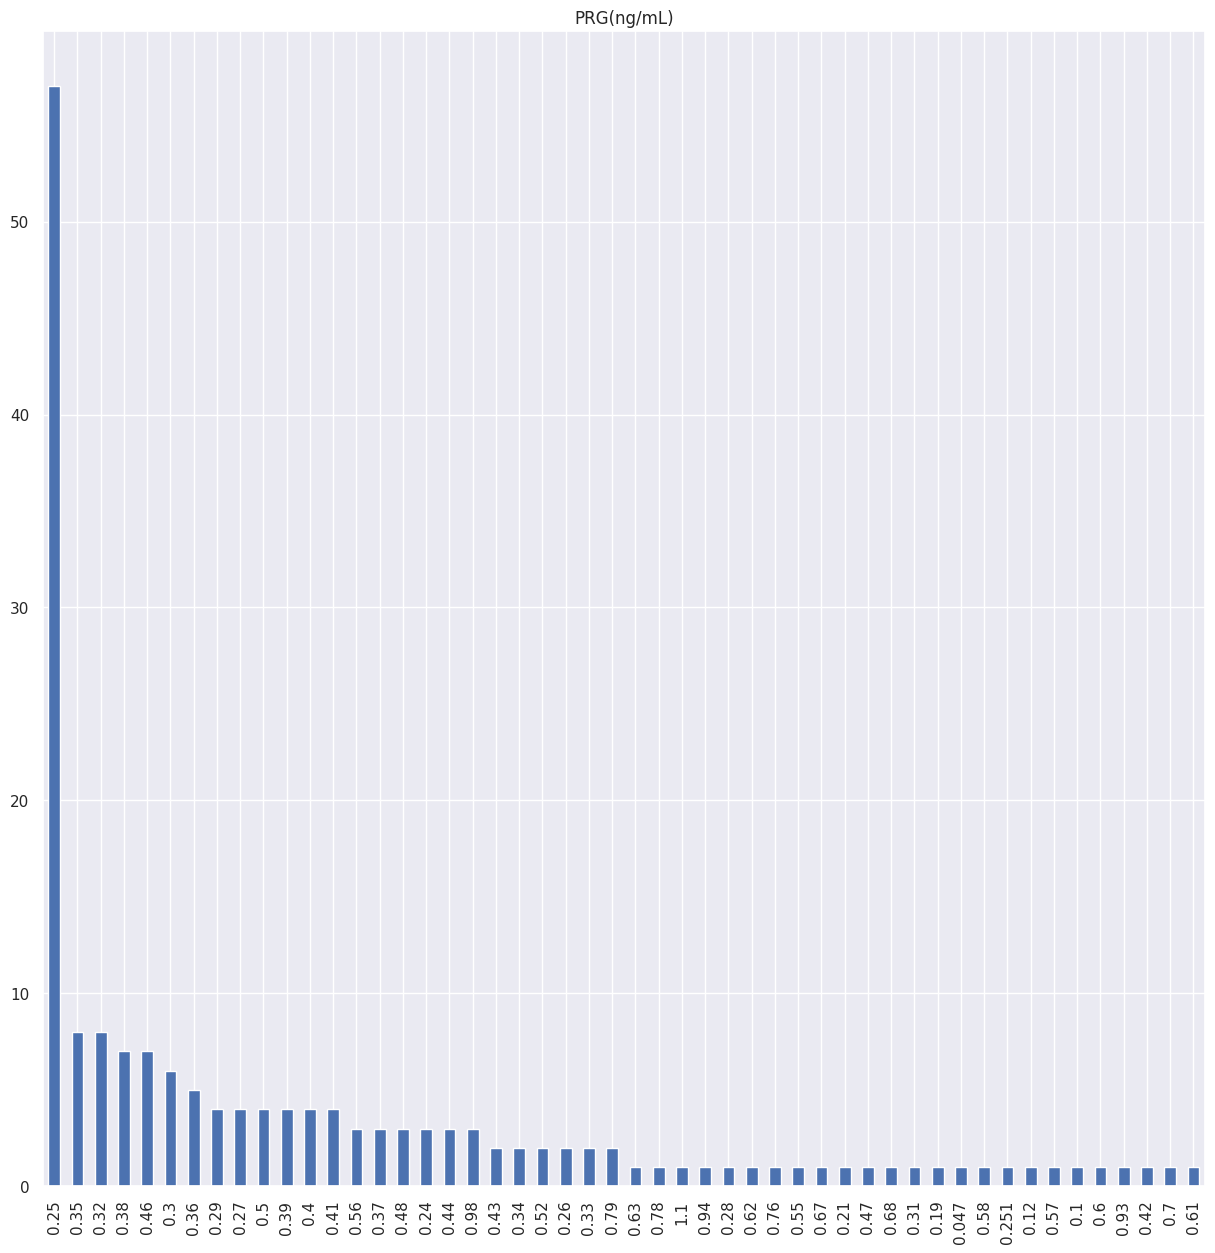

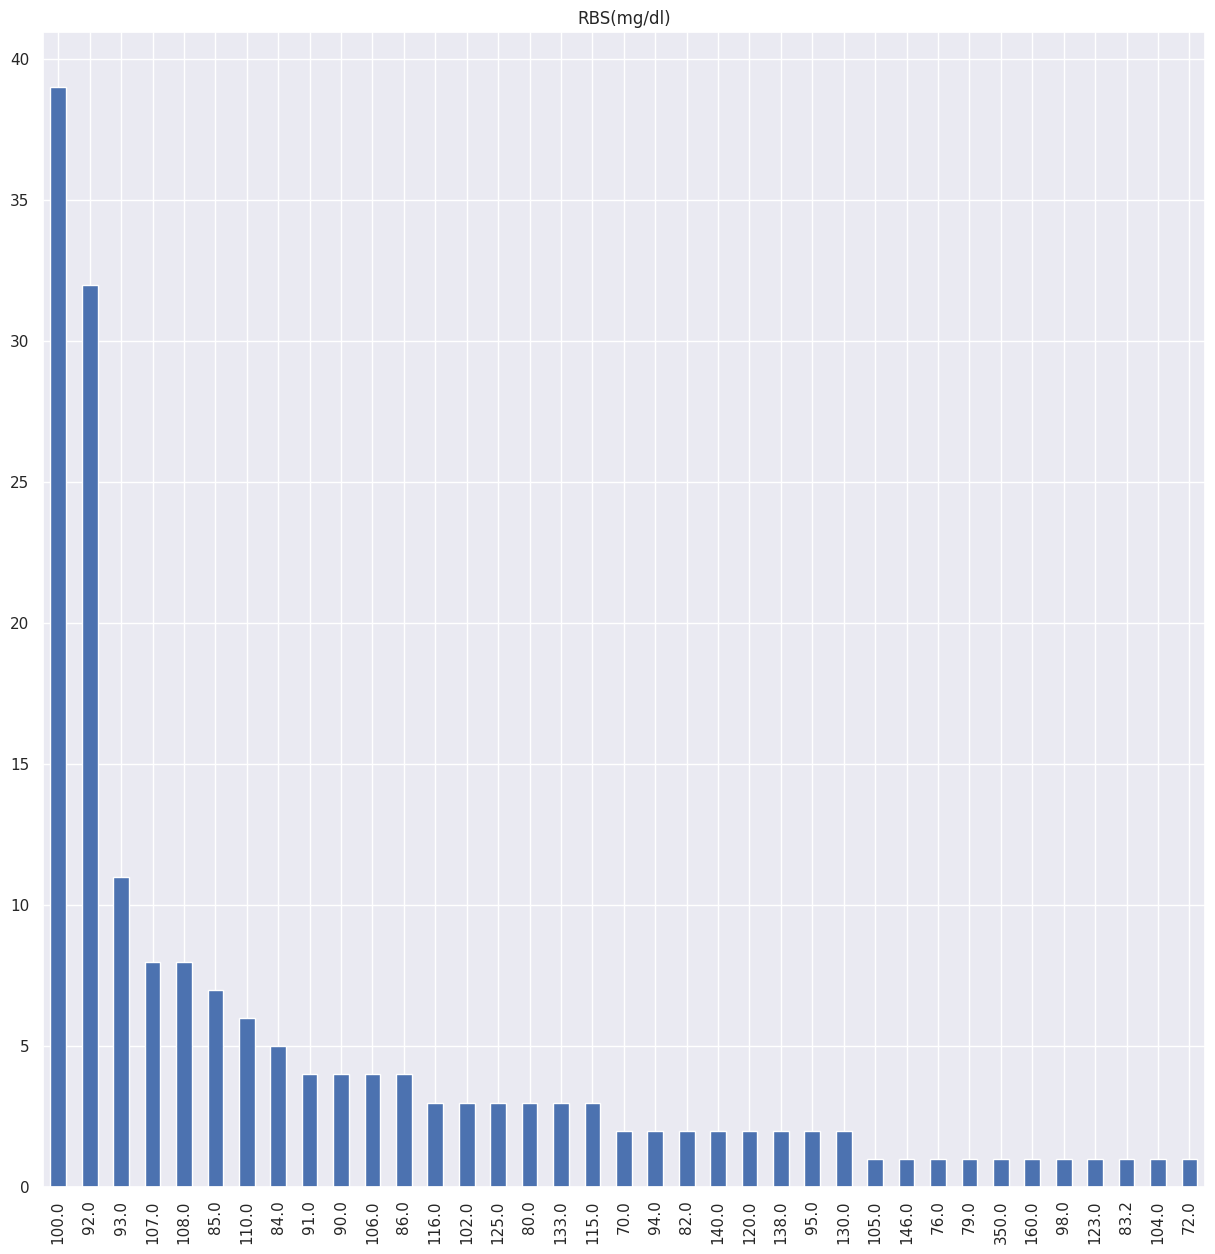

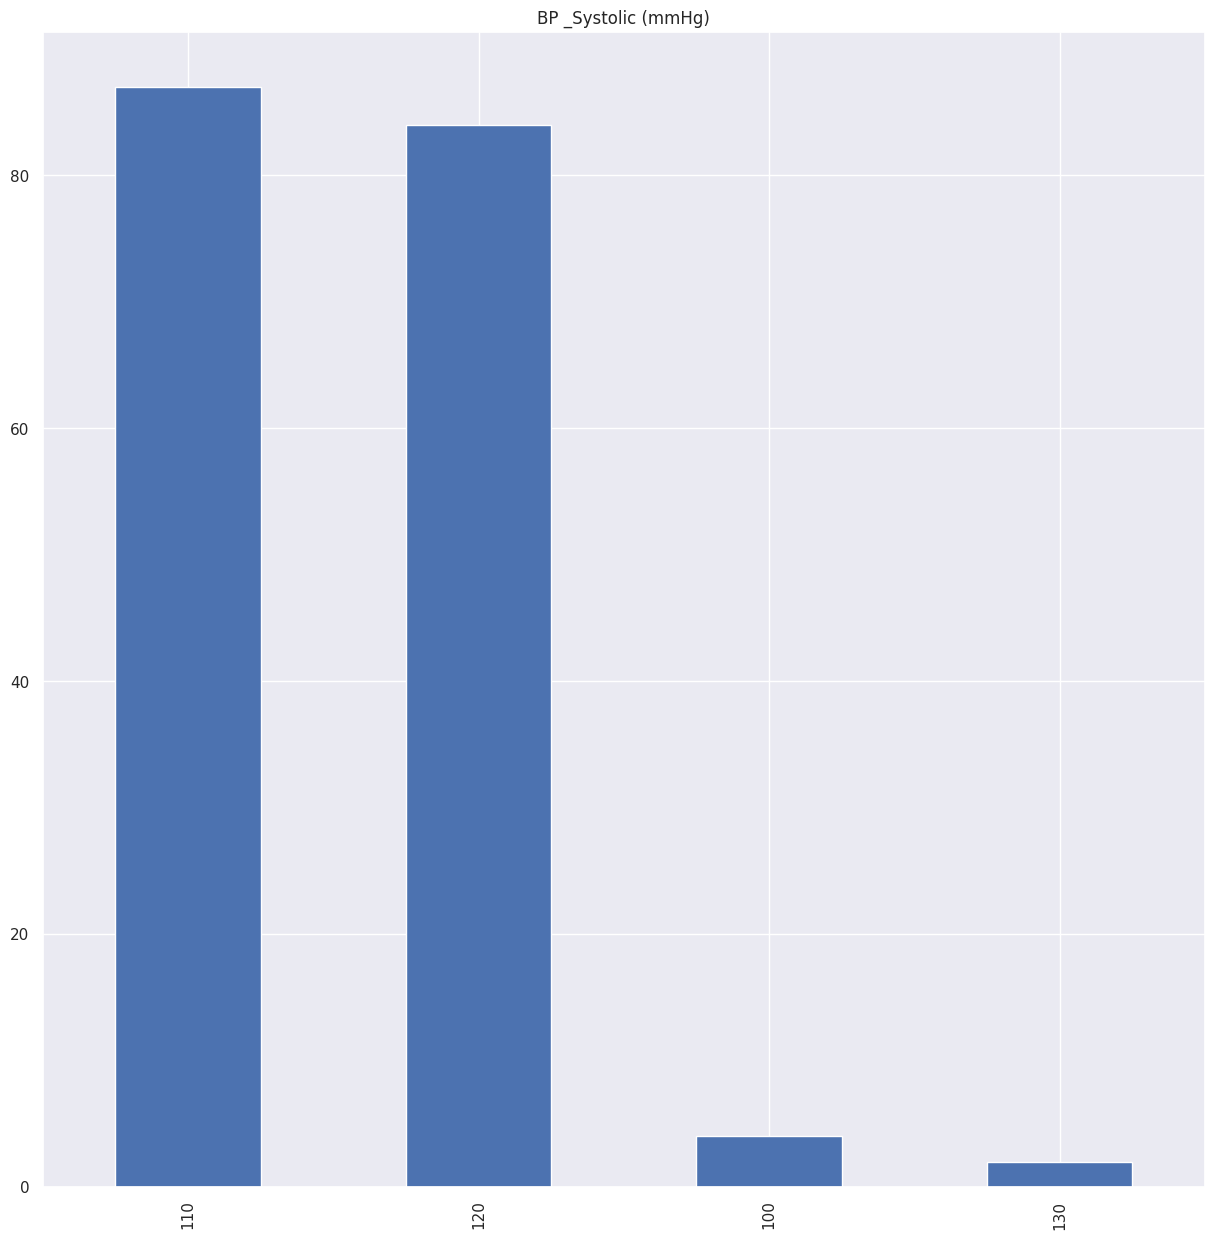

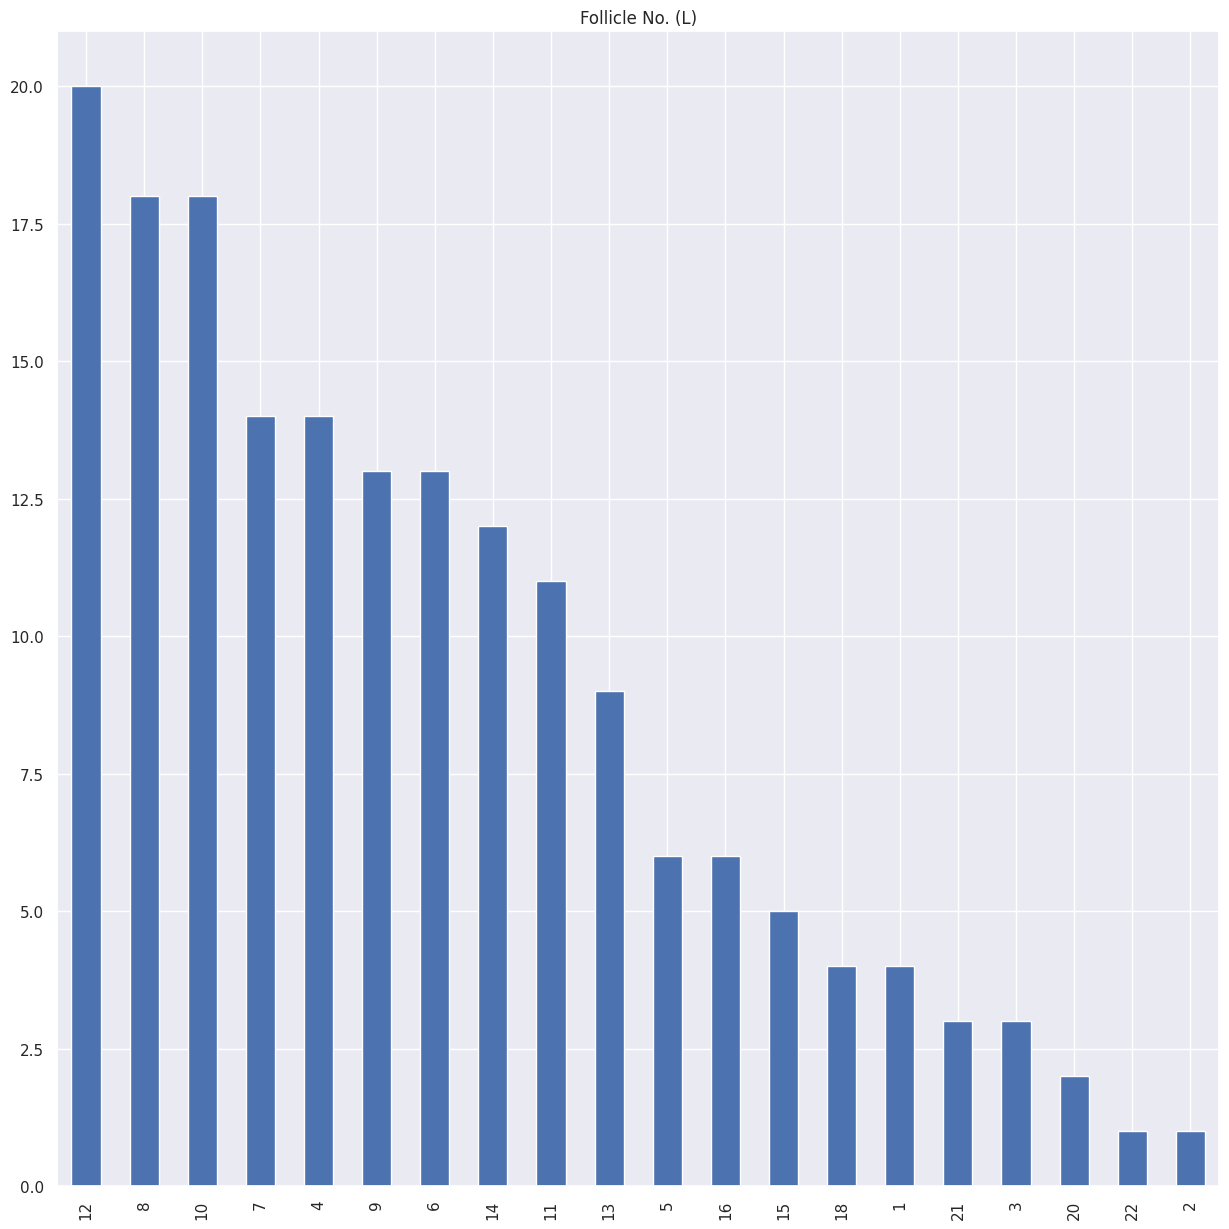

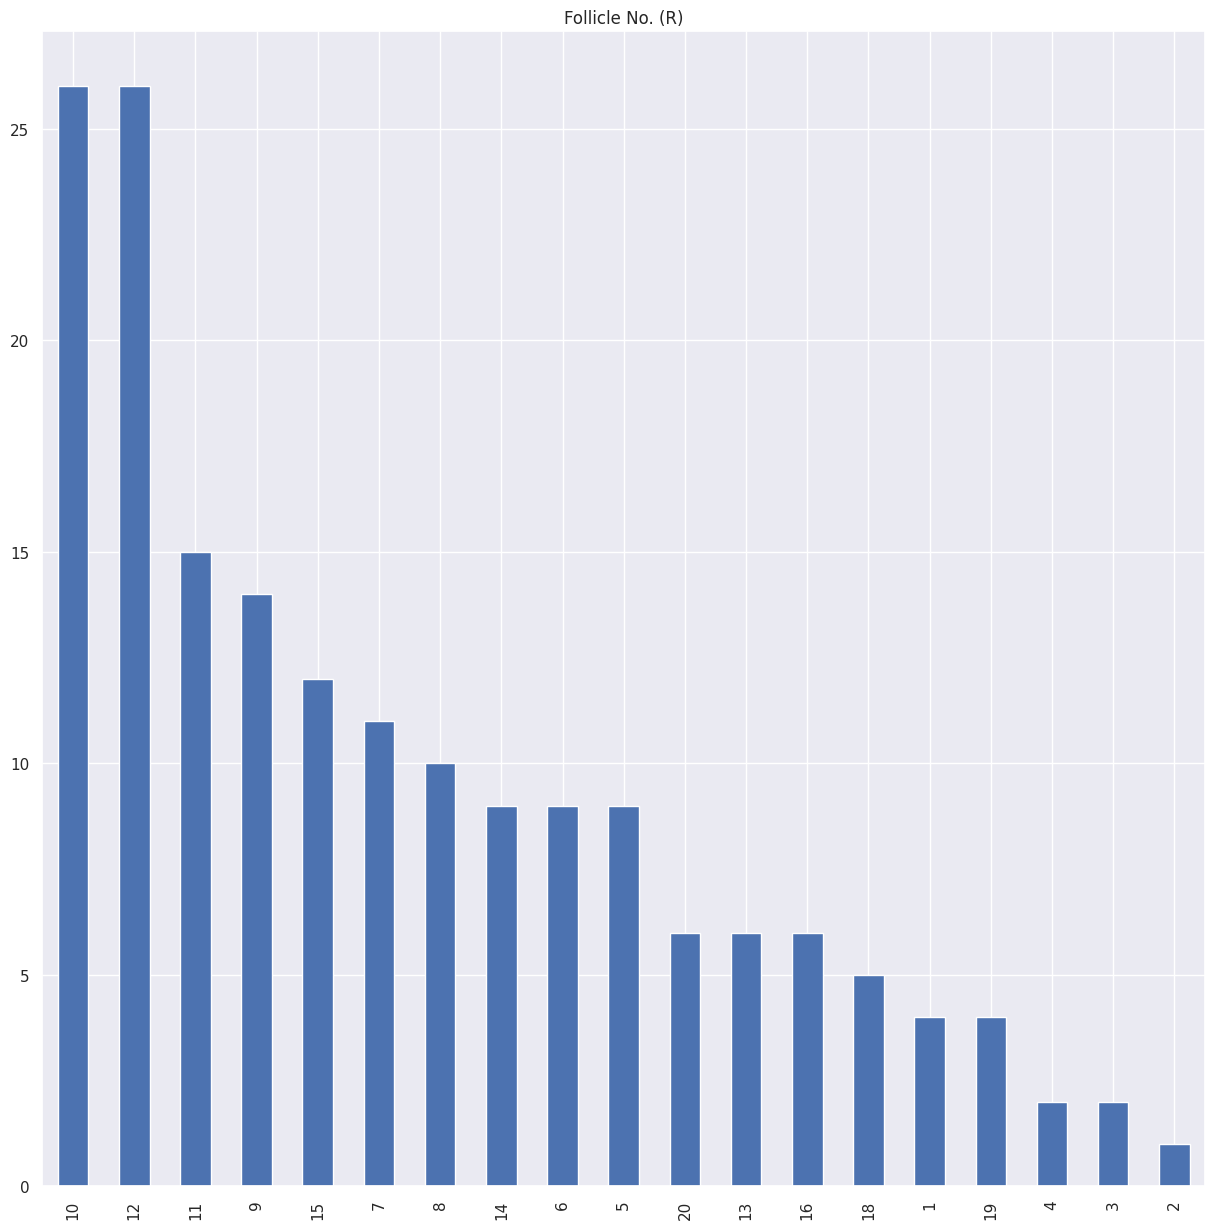

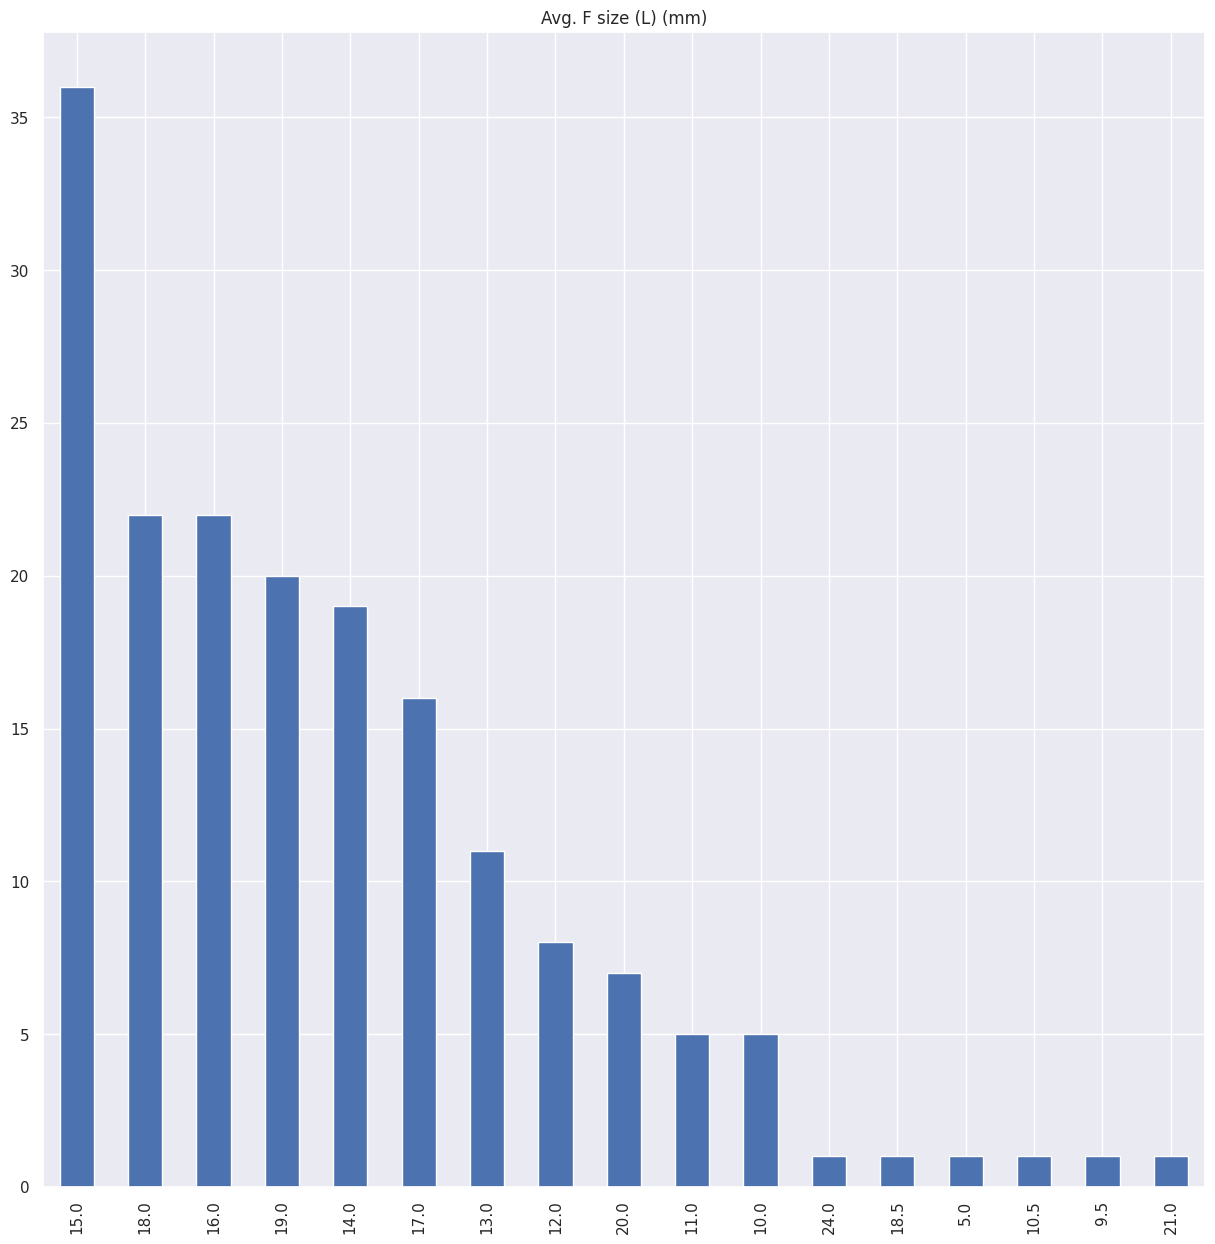

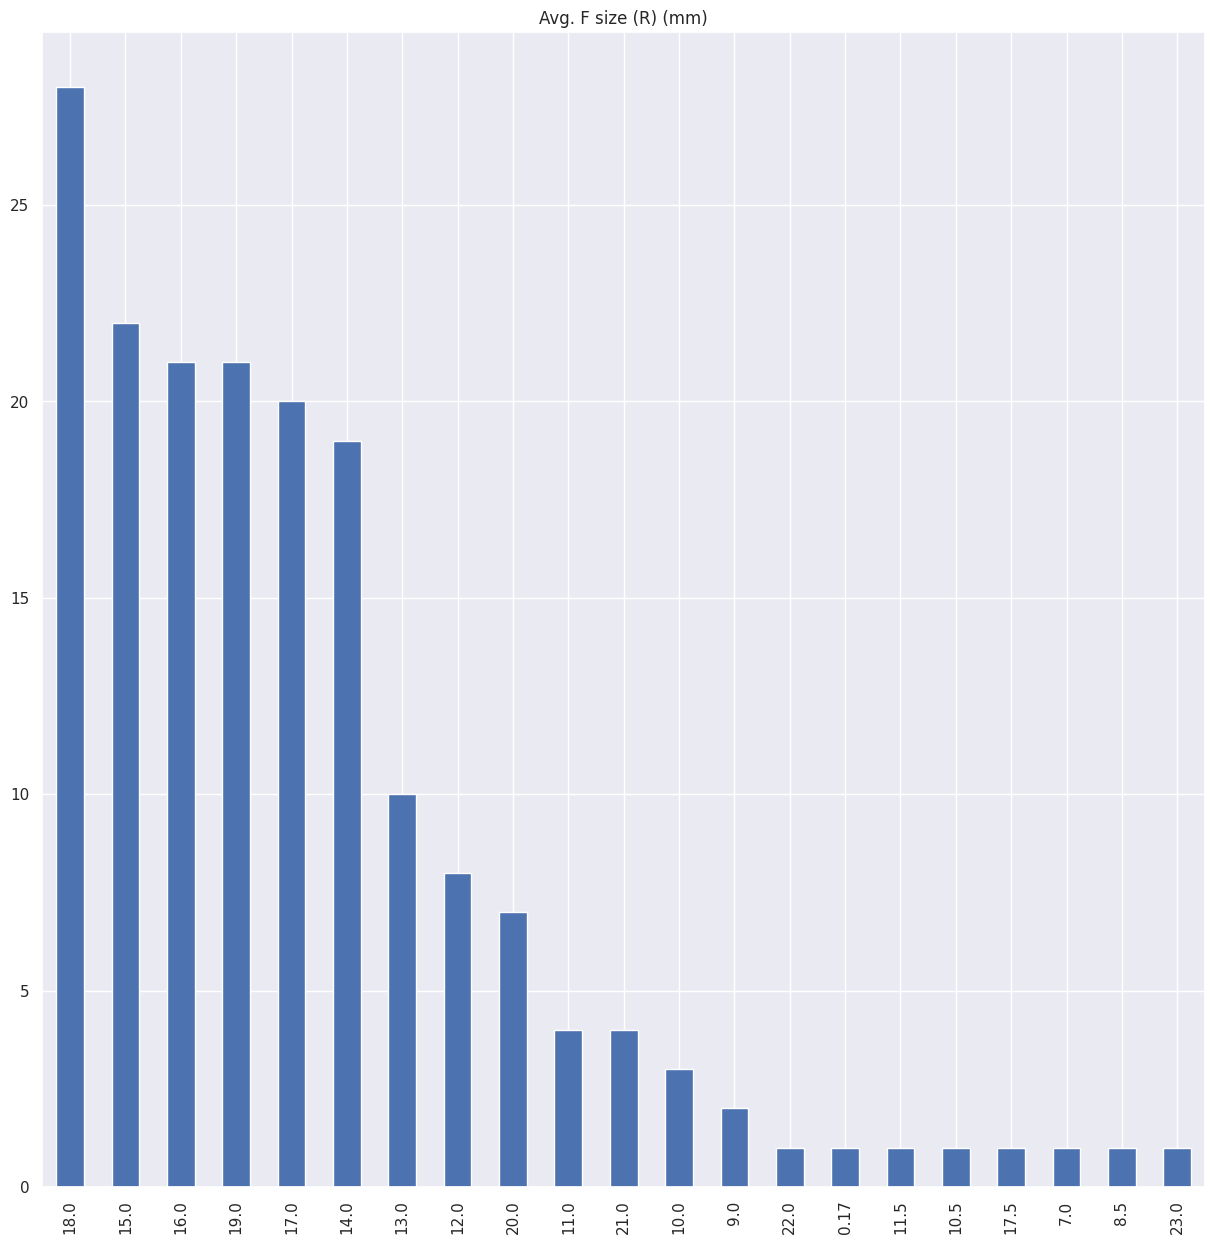

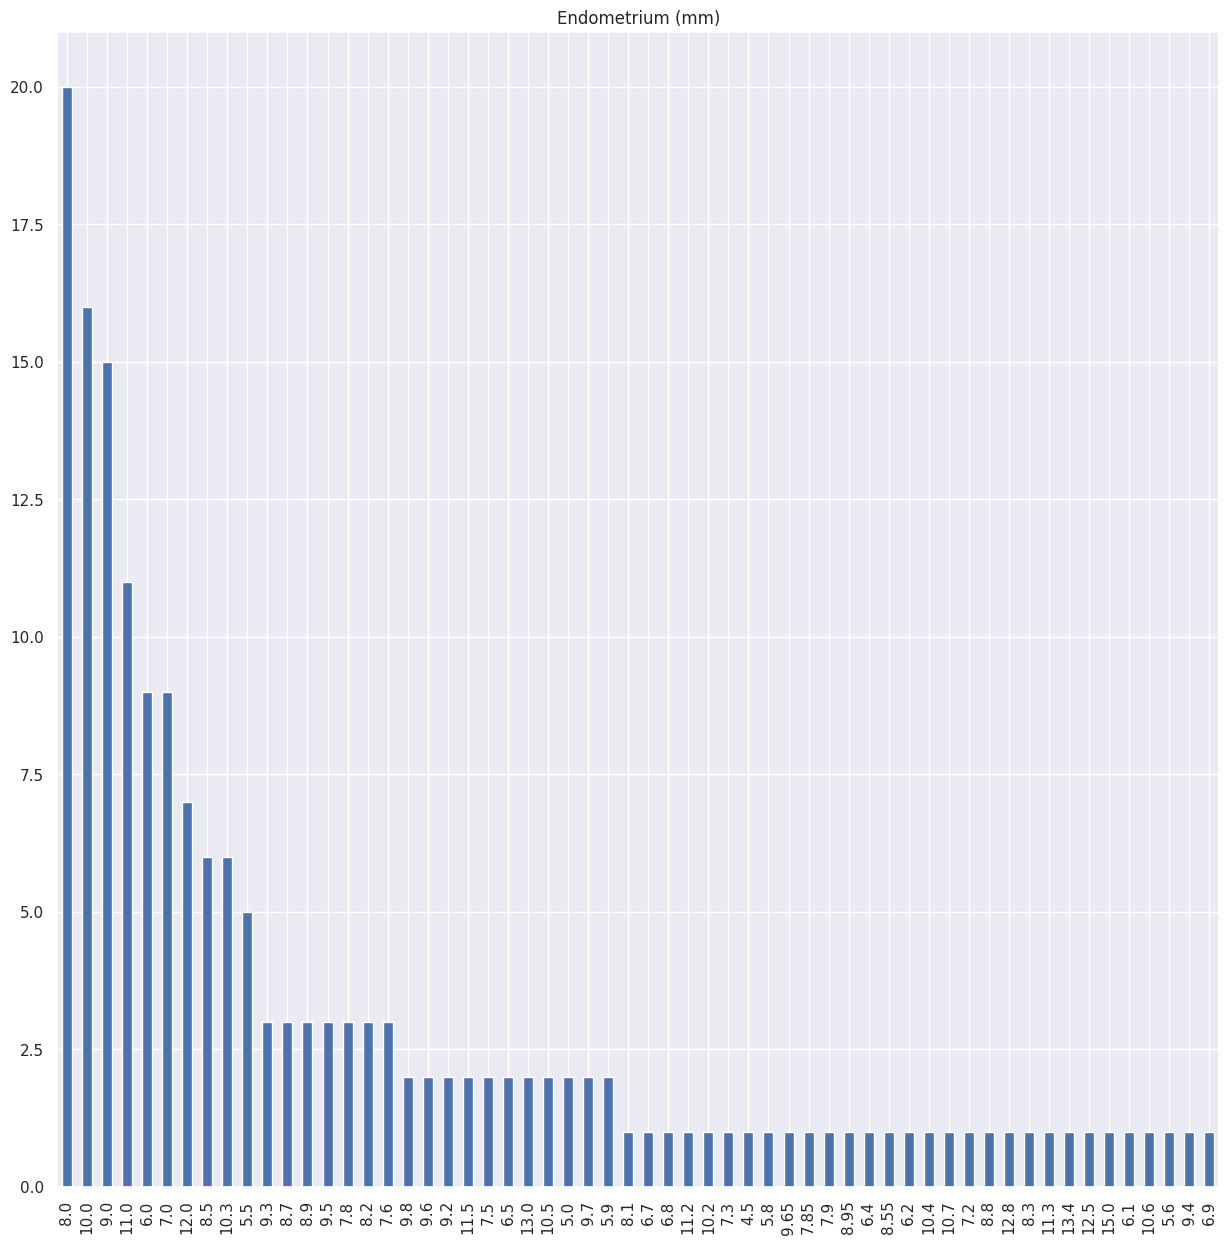

In [ ]:
import matplotlib.pyplot as plt #for plotting simple graphs
import seaborn as sns #another plotting library
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  final[final['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

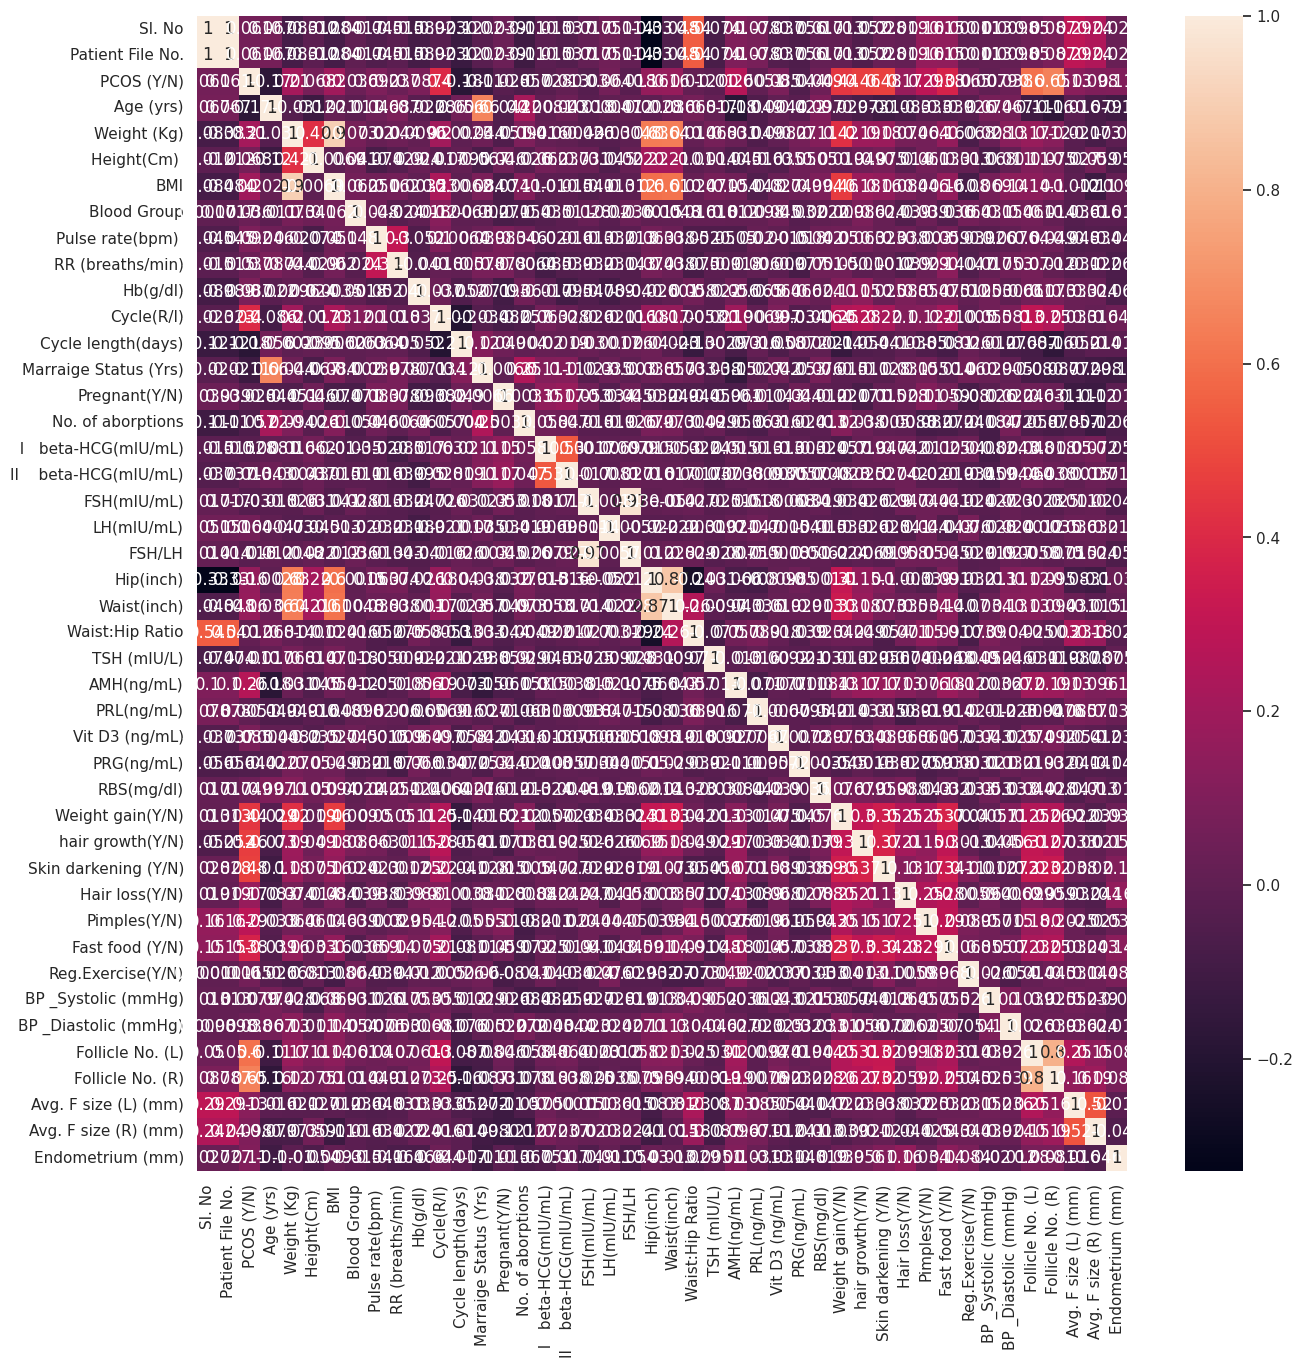

In [ ]:
sns.heatmap(final.corr('pearson'), annot =True )
plt.show()

In [ ]:
import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=final.drop(["PCOS (Y/N)"],axis = 1)
y=final["PCOS (Y/N)"]

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.7)
X, y = oversample.fit_resample(X, y)
y.value_counts()

0    364
1    254
Name: PCOS (Y/N), dtype: int64

In [ ]:
sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
cols = X.columns
x_scaled = sscaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0.0,0.15,0.136364,0.0,0.0,0.0,0.000000
1,0.0,0.25,0.136364,0.0,0.0,0.0,0.000000
2,1.0,0.75,0.590909,0.0,0.0,0.0,0.000000
3,0.0,0.10,0.090909,0.0,0.0,0.0,0.000000
4,0.0,0.20,0.136364,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
536,0.0,0.00,0.045455,0.0,0.0,0.0,0.000000
537,0.0,0.35,0.409091,0.0,0.0,1.0,0.000000
538,0.0,0.00,0.045455,0.0,0.0,0.0,0.000000
539,0.0,0.30,0.318182,0.0,0.0,0.0,0.666667


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.85

The confusion Matrix is : 
 [[95 11]
 [17 63]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       106
           1       0.85      0.79      0.82        80

    accuracy                           0.85       186
   macro avg       0.85      0.84      0.84       186
weighted avg       0.85      0.85      0.85       186



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#CLASSIFICATION USING NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Naive Bayes classifier on test set: 0.56

The confusion Matrix is : 
 [[31 75]
 [ 7 73]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.82      0.29      0.43       106
           1       0.49      0.91      0.64        80

    accuracy                           0.56       186
   macro avg       0.65      0.60      0.54       186
weighted avg       0.68      0.56      0.52       186



In [ ]:
#CLASSIFICATION USING DECISION TREE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test set: 0.81

The confusion Matrix is : 
 [[87 19]
 [17 63]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.77      0.79      0.78        80

    accuracy                           0.81       186
   macro avg       0.80      0.80      0.80       186
weighted avg       0.81      0.81      0.81       186

